# Exploratory visual analysis

There are multiple hypothesis that will be tested during this analysis but the first ones are the ones dependable on the relation of multiple values across our main dataset (daily port calls) with two dataset: weather data and trade value.

Port call data with weather data:
* Is there a correlation between weather conditions (e.g., wind speed, precipitation) and port congestion or delays?
* How do extreme weather events (e.g., storms, strong winds) impact the number of port calls?
* Are certain seasons (e.g., winter) associated with fewer port calls due to weather disruptions?

Port call data with import/export trade values:
* How does the number of port calls correlate with import/export trade values?
* Are ports with higher trade values associated with more frequent port calls?
* Do certain vessel types (e.g., large cargo ships) handle higher trade volumes?

Categorical analysis:
* How do seasons, vessel types, and ship sizes impact trade efficiency and port activity?
* Are there regional differences in port call frequency and trade values?

To explore this inicial hypothesis we are going to follow the next steps:
1. Create two new dataset port_calls_weather and port_calls_trade.
2. Explore correlation between different variables.
3. Create scatterplots to explore correlation.
4. Pair plots
5. Categorical analysis

### Import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

### Import data

In [2]:
path = '/Users/bobbi/Careerfoundry/Shipping_project/02 Data/Prepared Data'

# Import port data
port_data = pd.read_pickle(os.path.join(path, 'world_ports.pkl'))

# Import world trade data
world_trade = pd.read_pickle(os.path.join(path, 'world_trade.pkl'))

#Import weather data and concatenate
weather_1 = pd.read_pickle(os.path.join(path, 'country_weather.pkl'))

weather_2 = pd.read_pickle(os.path.join(path,'country_weather_2.pkl'))

weather_data = pd.concat((weather_1, weather_2), ignore_index = True)

In [3]:
world_trade.head()

,date,country,flowCode,flowDesc,motDesc,cifvalue,fobvalue,primaryValue,year
0,2015-01-01,Angola,M,Import,Water,6.304750e+04,5.392650e+04,6.304750e+04,2015
1,2015-01-01,Brazil,M,Import,Water,4.721910e+05,4.170910e+05,4.721910e+05,2015
2,2015-01-01,Brazil,X,Export,Water,NaN,6.859409e+07,6.859409e+07,2015
3,2015-01-01,Angola,M,Import,Sea,2.151730e+09,1.972705e+09,2.151730e+09,2015
4,2015-01-01,Angola,X,Export,Sea,0.000000e+00,2.664724e+09,2.664724e+09,2015


In [4]:
port_data.head()

,countryareaCode,country,vesselTypeCode,vessel_type,flowCode,flowDesc,date,num_pc,mtc,dwt,num_pc_ma,mtc_ma,dwt_ma
0,136,Cayman Isds,0,Total,X,Exports,2015-05-06,0,0.0,0,0.133,0.0,903.4
1,136,Cayman Isds,0,Total,X,Exports,2015-05-07,0,0.0,0,0.133,0.0,903.4
2,136,Cayman Isds,0,Total,X,Exports,2015-05-08,0,0.0,0,0.133,0.0,903.4
3,136,Cayman Isds,0,Total,X,Exports,2015-05-09,0,0.0,0,0.133,0.0,903.4
4,136,Cayman Isds,0,Total,X,Exports,2015-05-10,0,0.0,0,0.133,0.0,903.4


In [5]:
weather_data.head()

,date,temperature_2m_max,temperature_2m_min,temperature_2m_mean,precipitation_sum,rain_sum,wind_speed_10m_max,wind_gusts_10m_max,port,latitude,longitude
0,2015-01-01 00:00:00+00:00,29.823502,18.323502,23.136002,0.000000,0.000000,12.538134,27.719999,Angola,-11.2027,17.8739
1,2015-01-02 00:00:00+00:00,29.073502,18.523500,22.898504,2.700000,2.700000,10.144082,26.280001,Angola,-11.2027,17.8739
2,2015-01-03 00:00:00+00:00,26.973501,17.823502,21.829750,3.400000,3.400000,9.904906,23.039999,Angola,-11.2027,17.8739
3,2015-01-04 00:00:00+00:00,26.723501,18.773500,21.715170,7.300000,7.300000,10.163227,29.519999,Angola,-11.2027,17.8739
4,2015-01-05 00:00:00+00:00,29.273500,17.273500,22.258919,11.499999,11.499999,8.217153,23.759998,Angola,-11.2027,17.8739


In [6]:
# Change name of country colum
weather_data.rename(columns={"port": "country"}, inplace=True)

In [7]:
weather_data['date'] = pd.to_datetime(weather_data['date']).dt.strftime('%Y-%m-%d')

# Convert those strings back to a real datetime64 column
weather_data['date'] = pd.to_datetime(weather_data['date'], format='%Y-%m-%d')

In [8]:
weather_data.head()

,date,temperature_2m_max,temperature_2m_min,temperature_2m_mean,precipitation_sum,rain_sum,wind_speed_10m_max,wind_gusts_10m_max,country,latitude,longitude
0,2015-01-01,29.823502,18.323502,23.136002,0.000000,0.000000,12.538134,27.719999,Angola,-11.2027,17.8739
1,2015-01-02,29.073502,18.523500,22.898504,2.700000,2.700000,10.144082,26.280001,Angola,-11.2027,17.8739
2,2015-01-03,26.973501,17.823502,21.829750,3.400000,3.400000,9.904906,23.039999,Angola,-11.2027,17.8739
3,2015-01-04,26.723501,18.773500,21.715170,7.300000,7.300000,10.163227,29.519999,Angola,-11.2027,17.8739
4,2015-01-05,29.273500,17.273500,22.258919,11.499999,11.499999,8.217153,23.759998,Angola,-11.2027,17.8739


### 1. Create two subdata sets

First I am going to join weather_data to port_data using date and country in an inner join, we are only interested on the countries from which we have port data. Both data sets share a daily granularity so we don't need to aggregate any data.

In [9]:
port_data.dtypes

countryareaCode             int64
country                    object
vesselTypeCode              int64
vessel_type                object
flowCode                   object
flowDesc                   object
date               datetime64[ns]
num_pc                      int64
mtc                       float64
dwt                         int64
num_pc_ma                 float64
mtc_ma                    float64
dwt_ma                    float64
dtype: object

In [10]:
weather_data.dtypes

date                   datetime64[ns]
temperature_2m_max            float32
temperature_2m_min            float32
temperature_2m_mean           float32
precipitation_sum             float32
rain_sum                      float32
wind_speed_10m_max            float32
wind_gusts_10m_max            float32
country                        object
latitude                      float64
longitude                     float64
dtype: object

In [11]:
port_call_weather = port_data.merge(weather_data, on=['date', 'country'], how='inner')

port_call_weather.head()

,countryareaCode,country,vesselTypeCode,vessel_type,flowCode,flowDesc,date,num_pc,mtc,dwt,...,dwt_ma,temperature_2m_max,temperature_2m_min,temperature_2m_mean,precipitation_sum,rain_sum,wind_speed_10m_max,wind_gusts_10m_max,latitude,longitude
0,398,Kazakhstan,0,Total,X,Exports,2015-06-17,0,0.000,0,...,7156.167,29.943501,15.393499,24.249750,0.0,0.0,12.574260,24.119999,48.0196,66.9237
1,398,Kazakhstan,0,Total,X,Exports,2015-06-18,1,28009.056,13030,...,7408.133,30.293499,17.443501,25.064337,0.0,0.0,18.556595,34.919998,48.0196,66.9237
2,398,Kazakhstan,0,Total,X,Exports,2015-06-19,5,22385.359,24244,...,8216.267,31.443501,19.443501,25.872667,0.1,0.1,19.995398,33.119999,48.0196,66.9237
3,398,Kazakhstan,0,Total,X,Exports,2015-06-20,0,0.000,0,...,7982.800,31.043499,19.593500,25.499748,0.3,0.3,26.836306,47.880001,48.0196,66.9237
4,398,Kazakhstan,0,Total,X,Exports,2015-06-21,0,0.000,0,...,7759.133,29.393499,19.043499,24.416420,0.0,0.0,32.846920,60.839996,48.0196,66.9237


To understand the relationship between weather and port calls we don't need to know the vesseltype so we are going to create a subset representing total vessel type numbers. 

In [12]:
# Filter rows where vesselTypeDesc is "Total"
total_port_weather = port_call_weather[port_call_weather['vessel_type'] == "Total"]

In [13]:
total_port_weather['vessel_type'].unique()

array(['Total'], dtype=object)

In [14]:
total_port_weather.shape

(180077, 22)

Now we will create two separate sets of data for imports and other for exports

In [15]:
# Import
import_port_weather = total_port_weather[total_port_weather['flowCode'] == "M"]

# Export
export_port_weather = total_port_weather[total_port_weather['flowCode'] == "X"]

print("Import Subset:")
import_port_weather.head()

Import Subset:


,countryareaCode,country,vesselTypeCode,vessel_type,flowCode,flowDesc,date,num_pc,mtc,dwt,...,dwt_ma,temperature_2m_max,temperature_2m_min,temperature_2m_mean,precipitation_sum,rain_sum,wind_speed_10m_max,wind_gusts_10m_max,latitude,longitude
557963,480,Mauritius,0,Total,M,Imports,2020-01-01,2,3262.26,118391,...,147066.933,25.993000,20.993000,23.222168,5.100000,5.100000,22.226902,52.560001,-20.3484,57.5522
557964,480,Mauritius,0,Total,M,Imports,2020-01-02,2,0.00,93178,...,147887.467,25.542999,20.843000,23.199249,0.800000,0.800000,18.792551,39.959999,-20.3484,57.5522
557965,480,Mauritius,0,Total,M,Imports,2020-01-03,4,40255.10,277589,...,152475.467,25.143000,21.093000,22.655495,14.599999,14.599999,16.119801,34.200001,-20.3484,57.5522
557966,480,Mauritius,0,Total,M,Imports,2020-01-04,4,30671.50,427171,...,161249.200,25.093000,20.792999,22.263832,71.399994,71.399994,16.055355,41.039997,-20.3484,57.5522
557967,480,Mauritius,0,Total,M,Imports,2020-01-05,4,37805.70,605792,...,175626.467,23.393000,20.143000,21.461752,17.600006,17.600006,18.455048,40.680000,-20.3484,57.5522


In [16]:
print("\nExport Subset:")
export_port_weather.head()


Export Subset:


,countryareaCode,country,vesselTypeCode,vessel_type,flowCode,flowDesc,date,num_pc,mtc,dwt,...,dwt_ma,temperature_2m_max,temperature_2m_min,temperature_2m_mean,precipitation_sum,rain_sum,wind_speed_10m_max,wind_gusts_10m_max,latitude,longitude
0,398,Kazakhstan,0,Total,X,Exports,2015-06-17,0,0.000,0,...,7156.167,29.943501,15.393499,24.249750,0.0,0.0,12.574260,24.119999,48.0196,66.9237
1,398,Kazakhstan,0,Total,X,Exports,2015-06-18,1,28009.056,13030,...,7408.133,30.293499,17.443501,25.064337,0.0,0.0,18.556595,34.919998,48.0196,66.9237
2,398,Kazakhstan,0,Total,X,Exports,2015-06-19,5,22385.359,24244,...,8216.267,31.443501,19.443501,25.872667,0.1,0.1,19.995398,33.119999,48.0196,66.9237
3,398,Kazakhstan,0,Total,X,Exports,2015-06-20,0,0.000,0,...,7982.800,31.043499,19.593500,25.499748,0.3,0.3,26.836306,47.880001,48.0196,66.9237
4,398,Kazakhstan,0,Total,X,Exports,2015-06-21,0,0.000,0,...,7759.133,29.393499,19.043499,24.416420,0.0,0.0,32.846920,60.839996,48.0196,66.9237


In [17]:
missing_import = import_port_weather.isnull().sum()
print(missing_import)

countryareaCode        0
country                0
vesselTypeCode         0
vessel_type            0
flowCode               0
flowDesc               0
date                   0
num_pc                 0
mtc                    0
dwt                    0
num_pc_ma              0
mtc_ma                 0
dwt_ma                 0
temperature_2m_max     0
temperature_2m_min     0
temperature_2m_mean    0
precipitation_sum      0
rain_sum               0
wind_speed_10m_max     0
wind_gusts_10m_max     0
latitude               0
longitude              0
dtype: int64


In [18]:
missing_export = export_port_weather.isnull().sum()
print(missing_export)

countryareaCode        0
country                0
vesselTypeCode         0
vessel_type            0
flowCode               0
flowDesc               0
date                   0
num_pc                 0
mtc                    0
dwt                    0
num_pc_ma              0
mtc_ma                 0
dwt_ma                 0
temperature_2m_max     0
temperature_2m_min     0
temperature_2m_mean    0
precipitation_sum      0
rain_sum               0
wind_speed_10m_max     0
wind_gusts_10m_max     0
latitude               0
longitude              0
dtype: int64


Now to create a subset for port_data and trade_data we need to agregate the port data as trade_data has a monthly granularity, and as before we would use only data about total vessel type

In [19]:
total_vessel = port_data[port_data['vessel_type'] == "Total"]

In [20]:
# Convert 'date' to datetime format if not already
total_vessel["date"] = pd.to_datetime(port_data["date"])

# Create 'year_month' column
total_vessel["year_month"] = total_vessel["date"].dt.to_period("M")

# Aggregate data at a monthly level
monthly_port = (
    total_vessel.groupby(["year_month", "country", "flowCode", "vessel_type"], as_index=False)
    .agg({
        "num_pc": "sum",      
        "mtc": "sum",         
        "dwt": "sum",         
        "num_pc_ma": "sum",   
        "mtc_ma": "sum",
        "dwt_ma": "sum"
    })

)

# Convert 'year_month' to timestamp (first day of the month) for merging
monthly_port["date"] = monthly_port["year_month"].dt.to_timestamp()

monthly_port.head()

/var/folders/bs/25x482152nx68y1wp8l2g42c0000gn/T/ipykernel_73657/1811102558.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_vessel["date"] = pd.to_datetime(port_data["date"])
/var/folders/bs/25x482152nx68y1wp8l2g42c0000gn/T/ipykernel_73657/1811102558.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_vessel["year_month"] = total_vessel["date"].dt.to_period("M")


,year_month,country,flowCode,vessel_type,num_pc,mtc,dwt,num_pc_ma,mtc_ma,dwt_ma,date
0,2015-04,Africa,M,Total,3729,0.000,92174110,3586.901,0.000,9.189442e+07,2015-04-01
1,2015-04,Albania,M,Total,46,160372.409,346786,40.634,134457.996,2.820845e+05,2015-04-01
2,2015-04,Albania,X,Total,13,57709.428,165026,15.934,84806.963,1.671643e+05,2015-04-01
3,2015-04,Angola,M,Total,108,1286614.760,2505197,104.532,1324697.711,2.610117e+06,2015-04-01
4,2015-04,Angola,X,Total,47,85831.389,2420752,43.330,70679.169,2.185129e+06,2015-04-01


In [21]:
# Change name of period colum
world_trade.rename(columns={"date": "year_month"}, inplace=True)

In [22]:
world_trade['year_month'] = (
    pd.to_datetime(world_trade['year_month'])  # Convert to datetime
      .dt.strftime('%Y-%m')                   # Format as "2015-04", etc.
)

In [23]:
world_trade.head()

,year_month,country,flowCode,flowDesc,motDesc,cifvalue,fobvalue,primaryValue,year
0,2015-01,Angola,M,Import,Water,6.304750e+04,5.392650e+04,6.304750e+04,2015
1,2015-01,Brazil,M,Import,Water,4.721910e+05,4.170910e+05,4.721910e+05,2015
2,2015-01,Brazil,X,Export,Water,NaN,6.859409e+07,6.859409e+07,2015
3,2015-01,Angola,M,Import,Sea,2.151730e+09,1.972705e+09,2.151730e+09,2015
4,2015-01,Angola,X,Export,Sea,0.000000e+00,2.664724e+09,2.664724e+09,2015


In [24]:
monthly_port.dtypes

year_month          period[M]
country                object
flowCode               object
vessel_type            object
num_pc                  int64
mtc                   float64
dwt                     int64
num_pc_ma             float64
mtc_ma                float64
dwt_ma                float64
date           datetime64[ns]
dtype: object

In [25]:
world_trade['year_month'] = (
    pd.to_datetime(world_trade['year_month'], format='%Y-%m')
      .dt.to_period('M')  # convert to a month period
)

In [26]:
world_trade.dtypes

year_month      period[M]
country            object
flowCode           object
flowDesc           object
motDesc            object
cifvalue          float64
fobvalue          float64
primaryValue      float64
year                int32
dtype: object

In [27]:
monthly_port.shape

(13121, 11)

In [28]:
world_trade.shape

(12679, 9)

In [29]:
port_trade_data = pd.merge(monthly_port, world_trade, on=['year_month', 'country', 'flowCode'], how='inner')

In [30]:
port_trade_data.head()

,year_month,country,flowCode,vessel_type,num_pc,mtc,dwt,num_pc_ma,mtc_ma,dwt_ma,date,flowDesc,motDesc,cifvalue,fobvalue,primaryValue,year
0,2015-04,Angola,M,Total,108,1.286615e+06,2505197,104.532,1.324698e+06,2.610117e+06,2015-04-01,Import,Water,1.500000e+03,1.250000e+03,1.500000e+03,2015
1,2015-04,Angola,M,Total,108,1.286615e+06,2505197,104.532,1.324698e+06,2.610117e+06,2015-04-01,Import,Sea,1.413374e+09,1.302496e+09,1.413374e+09,2015
2,2015-04,Angola,X,Total,47,8.583139e+04,2420752,43.330,7.067917e+04,2.185129e+06,2015-04-01,Export,Sea,0.000000e+00,3.210582e+09,3.210582e+09,2015
3,2015-04,Benin,X,Total,18,0.000000e+00,592778,14.335,0.000000e+00,4.668884e+05,2015-04-01,Export,Sea,0.000000e+00,6.806180e+07,6.806180e+07,2015
4,2015-04,Brazil,X,Total,998,5.223796e+07,46398718,1015.666,5.088110e+07,4.775085e+07,2015-04-01,Export,Water,NaN,1.338799e+08,1.338799e+08,2015


### 2. Explore correlation between different variables.

After dividing the dataset into two subsets I will create another subset for each one just using the numerical data needed to explore correlation.

In [31]:
# Numerical set for port_weather set
numerical_weather_col = ['num_pc', 'mtc', 'dwt', 'num_pc_ma', 'mtc_ma',	'dwt_ma', 'temperature_2m_max', 'temperature_2m_min', 'temperature_2m_mean', 'precipitation_sum', 'rain_sum', 'wind_speed_10m_max', 'wind_gusts_10m_max']

export_weather_numerical = export_port_weather[numerical_weather_col]

import_weather_numerical = import_port_weather[numerical_weather_col]

numerical_trade_col = ['num_pc', 'mtc', 'dwt', 'num_pc_ma', 'mtc_ma',	'dwt_ma', 'cifvalue', 'fobvalue', 'primaryValue']

port_trade_numerical = port_trade_data[numerical_trade_col]

#### Explore port calls and weather data correlation

In [32]:
import_weather_numerical.corr()

,num_pc,mtc,dwt,num_pc_ma,mtc_ma,dwt_ma,temperature_2m_max,temperature_2m_min,temperature_2m_mean,precipitation_sum,rain_sum,wind_speed_10m_max,wind_gusts_10m_max
num_pc,1.000000,0.871898,0.899176,0.953273,0.860756,0.880572,-0.117954,-0.102385,-0.107808,0.008329,0.007864,0.060711,0.072239
mtc,0.871898,1.000000,0.972261,0.861583,0.956421,0.940768,0.003881,0.045052,0.027011,0.049051,0.051338,0.032817,0.045656
dwt,0.899176,0.972261,1.000000,0.886138,0.945919,0.959904,-0.004252,0.020871,0.011593,0.038235,0.040818,0.042414,0.044014
num_pc_ma,0.953273,0.861583,0.886138,1.000000,0.901853,0.923472,-0.121704,-0.104189,-0.110386,0.011011,0.010602,0.070662,0.084865
mtc_ma,0.860756,0.956421,0.945919,0.901853,1.000000,0.984464,0.006640,0.049955,0.030954,0.049231,0.051619,0.037591,0.051585
dwt_ma,0.880572,0.940768,0.959904,0.923472,0.984464,1.000000,-0.001792,0.024722,0.014969,0.038969,0.041650,0.047986,0.050246
temperature_2m_max,-0.117954,0.003881,-0.004252,-0.121704,0.006640,-0.001792,1.000000,0.911869,0.977907,-0.030914,-0.000311,-0.106910,-0.136441
temperature_2m_min,-0.102385,0.045052,0.020871,-0.104189,0.049955,0.024722,0.911869,1.000000,0.973528,0.103958,0.132745,-0.063436,-0.077317
temperature_2m_mean,-0.107808,0.027011,0.011593,-0.110386,0.030954,0.014969,0.977907,0.973528,1.000000,0.028486,0.058619,-0.074025,-0.104583
precipitation_sum,0.008329,0.049051,0.038235,0.011011,0.049231,0.038969,-0.030914,0.103958,0.028486,1.000000,0.990946,-0.074674,0.042137


In [33]:
export_weather_numerical.corr()

,num_pc,mtc,dwt,num_pc_ma,mtc_ma,dwt_ma,temperature_2m_max,temperature_2m_min,temperature_2m_mean,precipitation_sum,rain_sum,wind_speed_10m_max,wind_gusts_10m_max
num_pc,1.000000,0.437804,0.570939,0.650563,0.424356,0.545270,-0.042925,-0.024195,-0.032278,0.024527,0.025468,0.018121,0.032074
mtc,0.437804,1.000000,0.900636,0.652088,0.964248,0.878387,0.077768,0.063064,0.077956,-0.006665,-0.003015,0.056352,0.015667
dwt,0.570939,0.900636,1.000000,0.837098,0.877193,0.962486,0.025374,0.022518,0.028705,0.009420,0.013235,0.038798,0.022150
num_pc_ma,0.650563,0.652088,0.837098,1.000000,0.677824,0.870047,-0.066706,-0.037381,-0.049563,0.032943,0.034137,0.040323,0.063764
mtc_ma,0.424356,0.964248,0.877193,0.677824,1.000000,0.911344,0.081257,0.066328,0.081686,-0.003639,0.000123,0.060756,0.019251
dwt_ma,0.545270,0.878387,0.962486,0.870047,0.911344,1.000000,0.026873,0.024472,0.030671,0.013294,0.017241,0.044449,0.028289
temperature_2m_max,-0.042925,0.077768,0.025374,-0.066706,0.081257,0.026873,1.000000,0.920222,0.980344,-0.025158,0.010524,-0.148091,-0.173013
temperature_2m_min,-0.024195,0.063064,0.022518,-0.037381,0.066328,0.024472,0.920222,1.000000,0.975413,0.105477,0.139442,-0.106297,-0.120242
temperature_2m_mean,-0.032278,0.077956,0.028705,-0.049563,0.081686,0.030671,0.980344,0.975413,1.000000,0.031344,0.066672,-0.117771,-0.144871
precipitation_sum,0.024527,-0.006665,0.009420,0.032943,-0.003639,0.013294,-0.025158,0.105477,0.031344,1.000000,0.987958,-0.055003,0.051950


<function matplotlib.pyplot.show(close=None, block=None)>

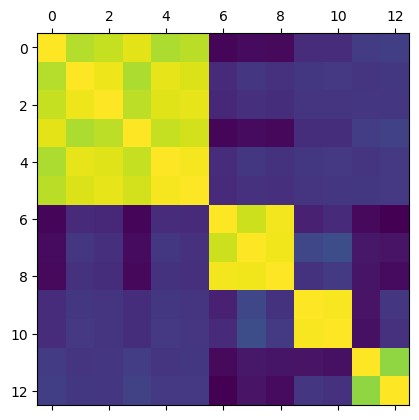

In [34]:
plt.matshow(import_weather_numerical.corr())
plt.show

<Figure size 1200x1000 with 0 Axes>

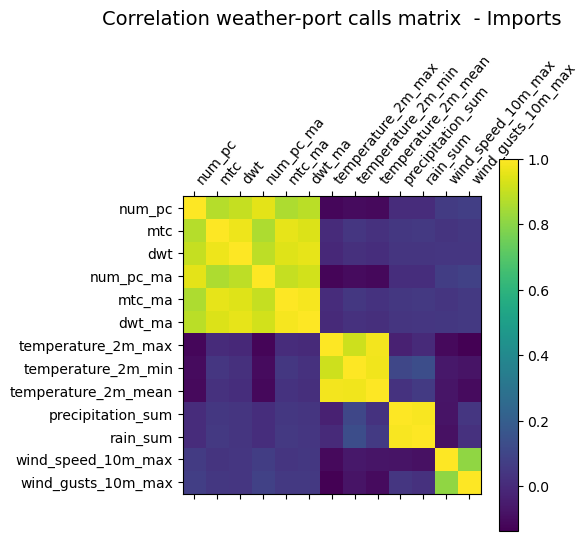

In [35]:
# Create figure
f = plt.figure(figsize=(12, 10))
plt.matshow(import_weather_numerical.corr().to_numpy())
plt.xticks(range(import_weather_numerical.shape[1]), import_weather_numerical.columns, fontsize=10, rotation=50, ha="left")
plt.yticks(range(import_weather_numerical.shape[1]), import_weather_numerical.columns, fontsize=10)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=10)
plt.title('Correlation weather-port calls matrix  - Imports', fontsize=14, pad=20)

plt.show()

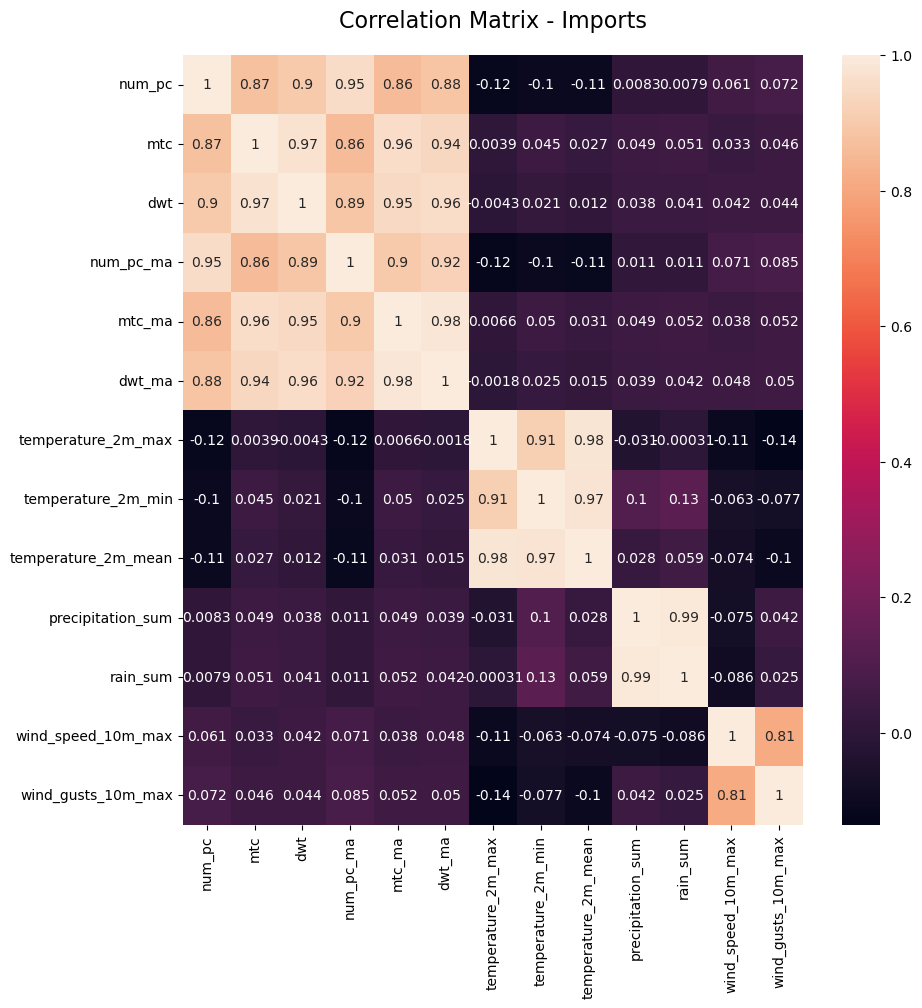

In [91]:
# Import seaborn heatmap
f, ax = plt.subplots(figsize=(10,10))

import_corr = sns.heatmap(import_weather_numerical.corr(), annot =True, ax=ax)

ax.set_title("Correlation Matrix - Imports", fontsize=16, pad=20)  

plt.savefig('/Users/bobbi/Careerfoundry/Shipping_project/04 Analysis/Visualizations/import_corr.png', dpi=300, bbox_inches='tight')

<Figure size 1200x1000 with 0 Axes>

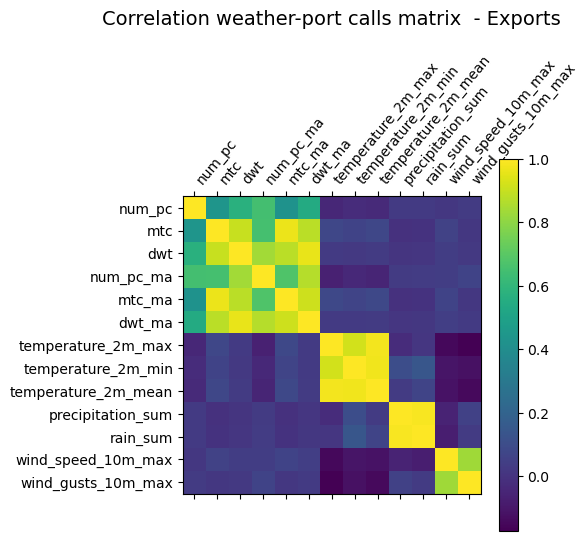

In [37]:
# Create figure
f = plt.figure(figsize=(12, 10))
plt.matshow(export_weather_numerical.corr().to_numpy())
plt.xticks(range(export_weather_numerical.shape[1]), export_weather_numerical.columns, fontsize=10, rotation=50, ha="left")
plt.yticks(range(export_weather_numerical.shape[1]), export_weather_numerical.columns, fontsize=10)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=10)
plt.title('Correlation weather-port calls matrix  - Exports', fontsize=14, pad=20)

plt.show()

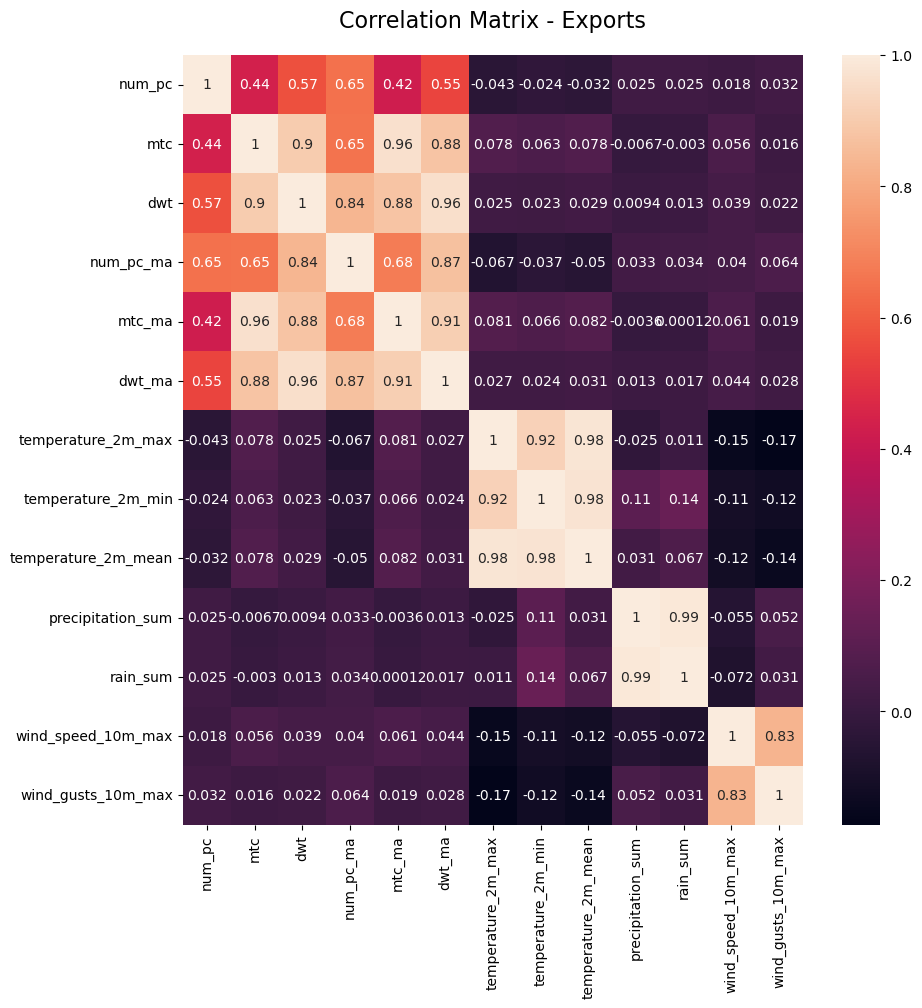

In [90]:
# Import seaborn heatmap
f, ax = plt.subplots(figsize=(10,10))

export_corr = sns.heatmap(export_weather_numerical.corr(), annot =True, ax=ax)

ax.set_title("Correlation Matrix - Exports", fontsize=16, pad=20)  

plt.savefig('/Users/bobbi/Careerfoundry/Shipping_project/04 Analysis/Visualizations/export_corr.png', dpi=300, bbox_inches='tight')


Strong positive correlations (highly related variables)

* num_port_calls ↔ metric_tons_capacity (0.92) The number of port calls is highly correlated with the total metric tons capacity. This makes sense as more vessel traffic typically brings higher cargo capacity.
* metric_tons_capacity ↔ deadweight_tonnage (0.93) The larger the metric tonnage capacity, the larger the deadweight tonnage. Deadweight tonnage is a measure of the total weight a vessel can carry, including cargo.
* metric_tons_capacity_moving_avg ↔ metric_tons_capacity (0.99) The moving average metric tonnage strongly aligns with the actual tonnage over time. This suggests a stable trend in tonnage fluctuations.
* total_precipitation ↔ total_rainfall (0.99) These are essentially the same measure, reinforcing their expected correlation.

Moderate Positive Correlations
* num_port_calls ↔ deadweight_tonnage (0.87) More port calls generally lead to higher total cargo loads.
* max_wind_speed_10m ↔ max_wind_gusts_10m (0.66) Strong winds and gusts are naturally linked, as expected.

Negative Correlations (Inverse Relationships)
* max_temperature_2m ↔ total_precipitation (-0.16) Warmer temperatures correlate with lower rainfall. This suggests that higher temperatures might be linked to drier periods, a pattern expected in some climates.
* min_temperature_2m ↔ max_wind_gusts_10m (-0.21) Colder temperatures are slightly associated with higher wind gusts. This could indicate seasonal effects, where colder months bring stronger winds.

Weak/No Correlation
* Temperature variables (max_temperature_2m, min_temperature_2m, mean_temperature_2m) show weak correlations with trade and port-related values. This means temperature does not directly influence trade volume in this dataset.
* total_precipitation and trade metrics (num_port_calls, metric_tons_capacity, deadweight_tonnage) show that precipitation has little to no impact on trade values in this dataset.

What this correlations suggest is that port related variables are strongly correlated as for example vessel capacity strongly determines corgo volume.

It also suggests that weather factors are weakly connected to trade, temperature and precipitation don't seem to impact imports directly. Whereas wind speed and gusts are somewhat connected, but their effect on trade is minimal.

We also can see a higher correlation in imports as in exports.

#### Port data and trade data correlation

In [39]:
port_trade_numerical.corr()

,num_pc,mtc,dwt,num_pc_ma,mtc_ma,dwt_ma,cifvalue,fobvalue,primaryValue
num_pc,1.000000,0.657261,0.821950,0.974886,0.657283,0.820293,0.594862,0.559388,0.671450
mtc,0.657261,1.000000,0.882222,0.662404,0.997523,0.879341,0.375810,0.427718,0.455433
dwt,0.821950,0.882222,1.000000,0.828070,0.881040,0.997181,0.636243,0.567005,0.658330
num_pc_ma,0.974886,0.662404,0.828070,1.000000,0.664730,0.830950,0.599304,0.565026,0.678151
mtc_ma,0.657283,0.997523,0.881040,0.664730,1.000000,0.882065,0.378861,0.428678,0.456995
dwt_ma,0.820293,0.879341,0.997181,0.830950,0.882065,1.000000,0.638744,0.568083,0.659643
cifvalue,0.594862,0.375810,0.636243,0.599304,0.378861,0.638744,1.000000,0.332877,0.726344
fobvalue,0.559388,0.427718,0.567005,0.565026,0.428678,0.568083,0.332877,1.000000,0.929630
primaryValue,0.671450,0.455433,0.658330,0.678151,0.456995,0.659643,0.726344,0.929630,1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

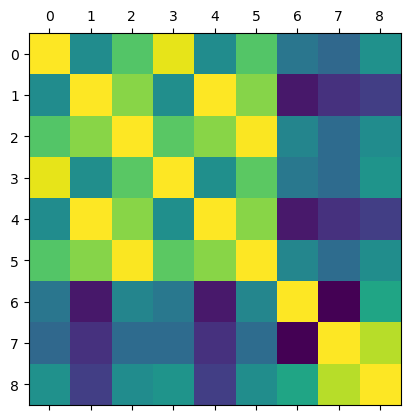

In [40]:
plt.matshow(port_trade_numerical.corr())
plt.show

<Figure size 1200x1000 with 0 Axes>

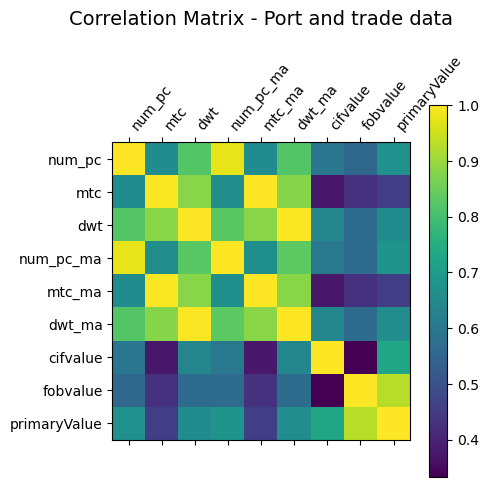

In [41]:
# Create figure
f = plt.figure(figsize=(12, 10))
plt.matshow(port_trade_numerical.corr().to_numpy())
plt.xticks(range(port_trade_numerical.shape[1]), port_trade_numerical.columns, fontsize=10, rotation=50, ha="left")
plt.yticks(range(port_trade_numerical.shape[1]), port_trade_numerical.columns, fontsize=10)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=10)
plt.title('Correlation Matrix - Port and trade data', fontsize=14, pad=20)

plt.show()

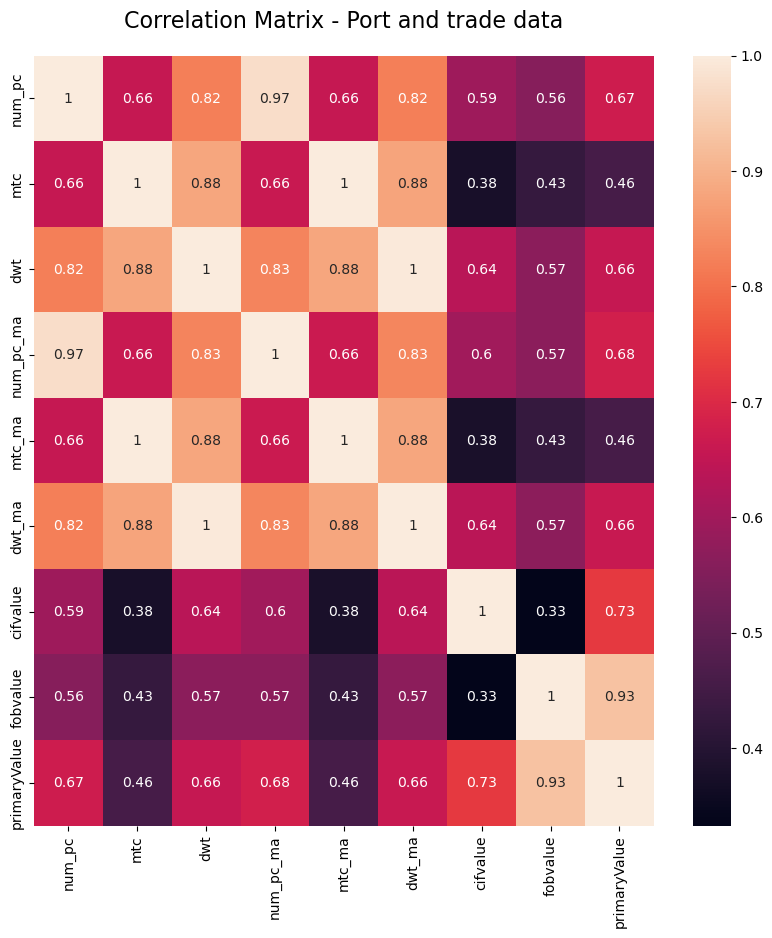

In [89]:
# Import seaborn heatmap
f, ax = plt.subplots(figsize=(10,10))

port_trade_corr = sns.heatmap(port_trade_numerical.corr(), annot =True, ax=ax)

ax.set_title("Correlation Matrix - Port and trade data", fontsize=16, pad=20)  

plt.savefig('/Users/bobbi/Careerfoundry/Shipping_project/04 Analysis/Visualizations/trade_corr.png', dpi=300, bbox_inches='tight')

Strong Positive Correlations
- **mtc and mtc_ma (0.86)**: The metric tons carried (mtc) and its moving average (mtc_ma) are highly correlated. This is expected because mtc_ma is derived directly from mtc.
- **dwt and dwt_ma (1.00)**: The deadweight tonnage (dwt) and its moving average (dwt_ma) are perfectly correlated, reflecting the fact that dwt_ma is calculated from dwt.
- **fobvalue and primaryValue (0.97)**: The export value (fobvalue) and total trade value (primaryValue) show a very high correlation, indicating that exports make up a substantial portion of total trade value.

Moderate Positive Correlations
- **mtc and dwt (0.86)**: There is a strong link between the metric tons carried (mtc) and vessel capacity (dwt). Larger vessels generally carry more cargo.
- **num_pc_ma and mtc_ma (0.67)**: The moving average of port calls (num_pc_ma) and the moving average of metric tons carried (mtc_ma) are moderately correlated, suggesting that ports with more frequent calls over time tend to handle higher cargo volumes.

Weak Positive Correlations
- **dwt and fobvalue (0.32)**: Vessel capacity (dwt) and export value (fobvalue) show a weak positive correlation, indicating that larger ships may carry higher-value exports, but the relationship is not strong.
- **mtc and primaryValue (0.29)**: The metric tons carried (mtc) and total trade value (primaryValue) have a weak positive relationship, suggesting that higher cargo volumes correspond to higher total trade values, though other factors are also influential.

Very Weak or No Correlations (Close to 0)
- **num_pc_ma and fobvalue (0.028)**: There is virtually no correlation between the moving average of port calls (num_pc_ma) and export value (fobvalue), implying that the number of port calls does not strongly affect export value.
- **mtc and fobvalue (0.24)**: The metric tons carried (mtc) and export value (fobvalue) have a very weak correlation, indicating that cargo volume alone is not a strong predictor of export value.

### 3. Create scatterplots to explore correlation.

Text(0.5, 1.05, 'Scatterplot: Metric Tons Capacity vs. Port Calls (Imports)')

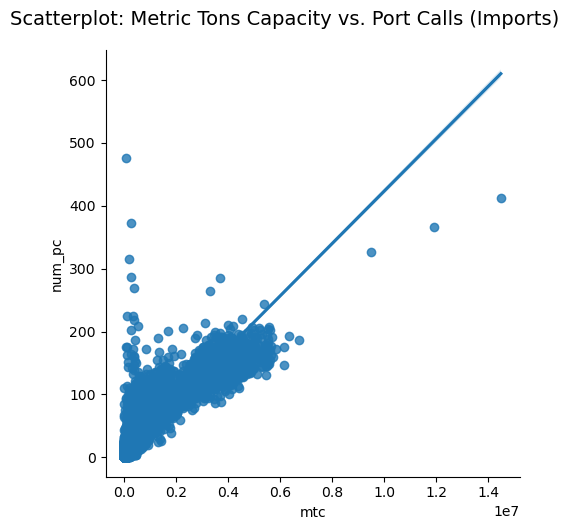

In [43]:
plot_imports = sns.lmplot(x = 'mtc', y='num_pc', data = import_port_weather)
plot_imports.fig.suptitle("Scatterplot: Metric Tons Capacity vs. Port Calls (Imports)", fontsize=14, y=1.05)

Text(0.5, 1.05, 'Scatterplot: Metric Tons Capacity vs. Port Calls')

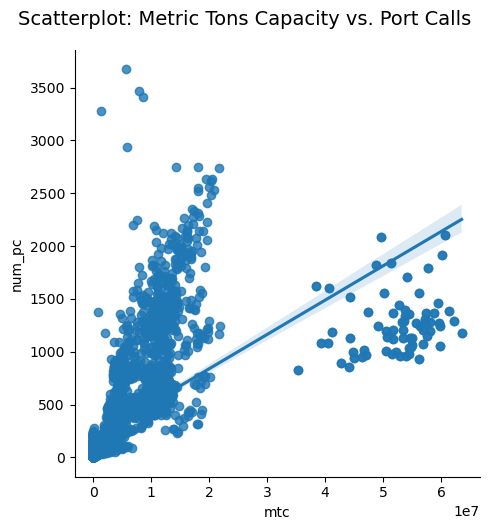

In [44]:
plot_trade = sns.lmplot(x = 'mtc', y='num_pc', data = port_trade_data)
plot_trade.fig.suptitle("Scatterplot: Metric Tons Capacity vs. Port Calls", fontsize=14, y=1.05)

In the imports scatterplot, we observe a strong positive correlation between the number of port calls and metric tons capacity. The data points are closely aligned with the regression line, indicating low variability and a consistent relationship. This suggests that higher port activity (more port calls) is strongly linked to larger cargo volumes in imports. In the export scatterplot we can see that there is no relationship as the slope is almost flat. 

However in export scatterplot, while the relationship still exists, the trend is  a bit weaker. The slope of the regression line is flatter, indicating a lower correlation between port calls and metric tons capacity for exports. Additionally, there is higher dispersion, with numerous outliers deviating significantly from the trend. These outliers suggest that some exports may involve large cargo volumes without a proportional increase in port calls, potentially due to factors like bulk shipments, vessel size differences, or specific trade agreements.

This difference between scatterplots can be due to granularity and aggregation.

### 4. Pair plots

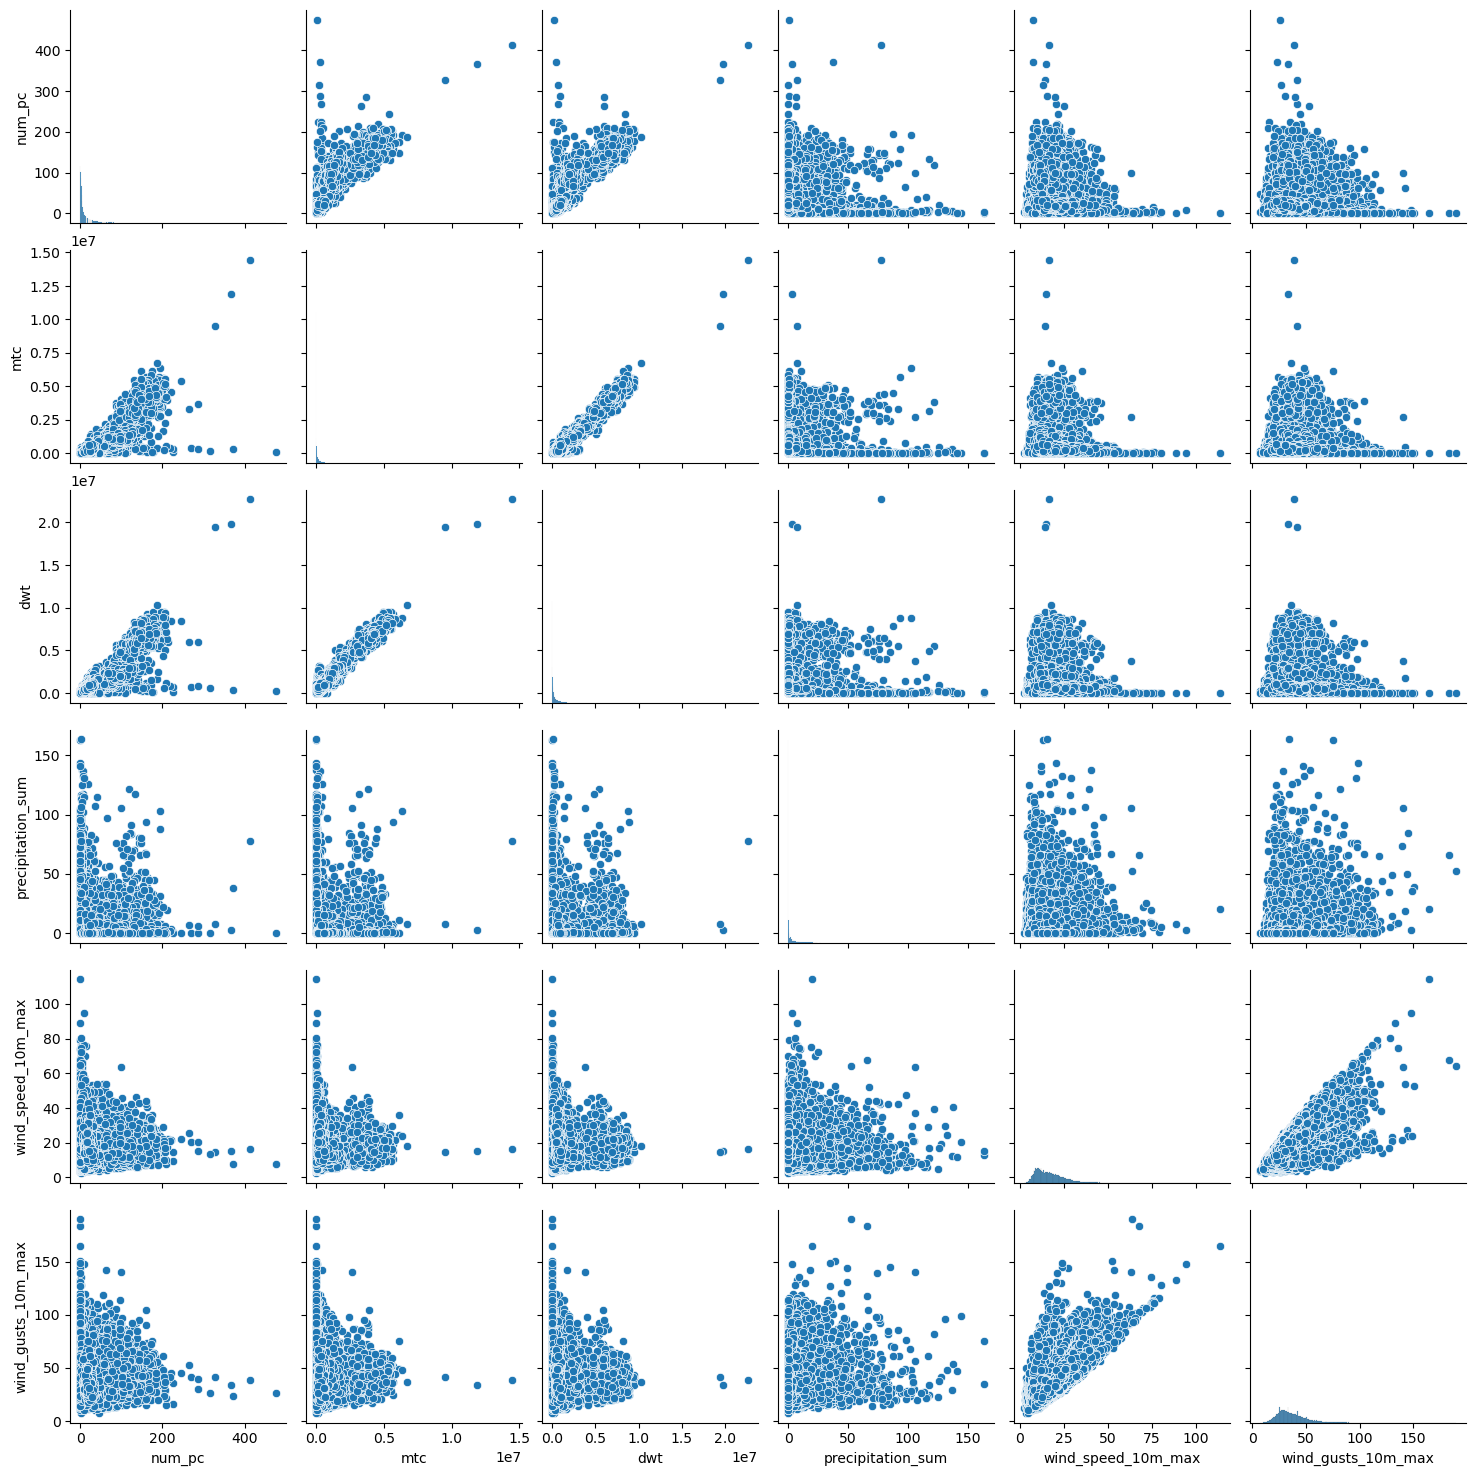

In [45]:
# Imports pair weather plots
import_sub = import_weather_numerical[['num_pc', 'mtc', 'dwt', 'precipitation_sum', 'wind_speed_10m_max', 'wind_gusts_10m_max']]

import_pair = sns.pairplot(import_sub)

Strong Correlations:

* Metric tons capacity & deadweight tonnage: These two variables are highly correlated, suggesting that the carrying capacity of vessels strongly influences total weight transported.
* Number of port calls & metric tons capacity: A clear linear trend indicates that more vessel traffic is associated with higher cargo capacity.
* Deadweight tonnage and number of port calls: there is a clear linear trends that indicates that more vessel traffic is associated with more tonnage.
* Max wind speed & max wind gusts: Strong positive correlation as expected since gusts are extreme cases of wind speed.

Skewed Distributions:
* All port values: Right-skewed distributions with extreme values indication that vessel traffic, tonnage and capacity vary significant across records.
Weak or No Correlation:
* Weather data doesn't have any impact in port activity whatsoever.

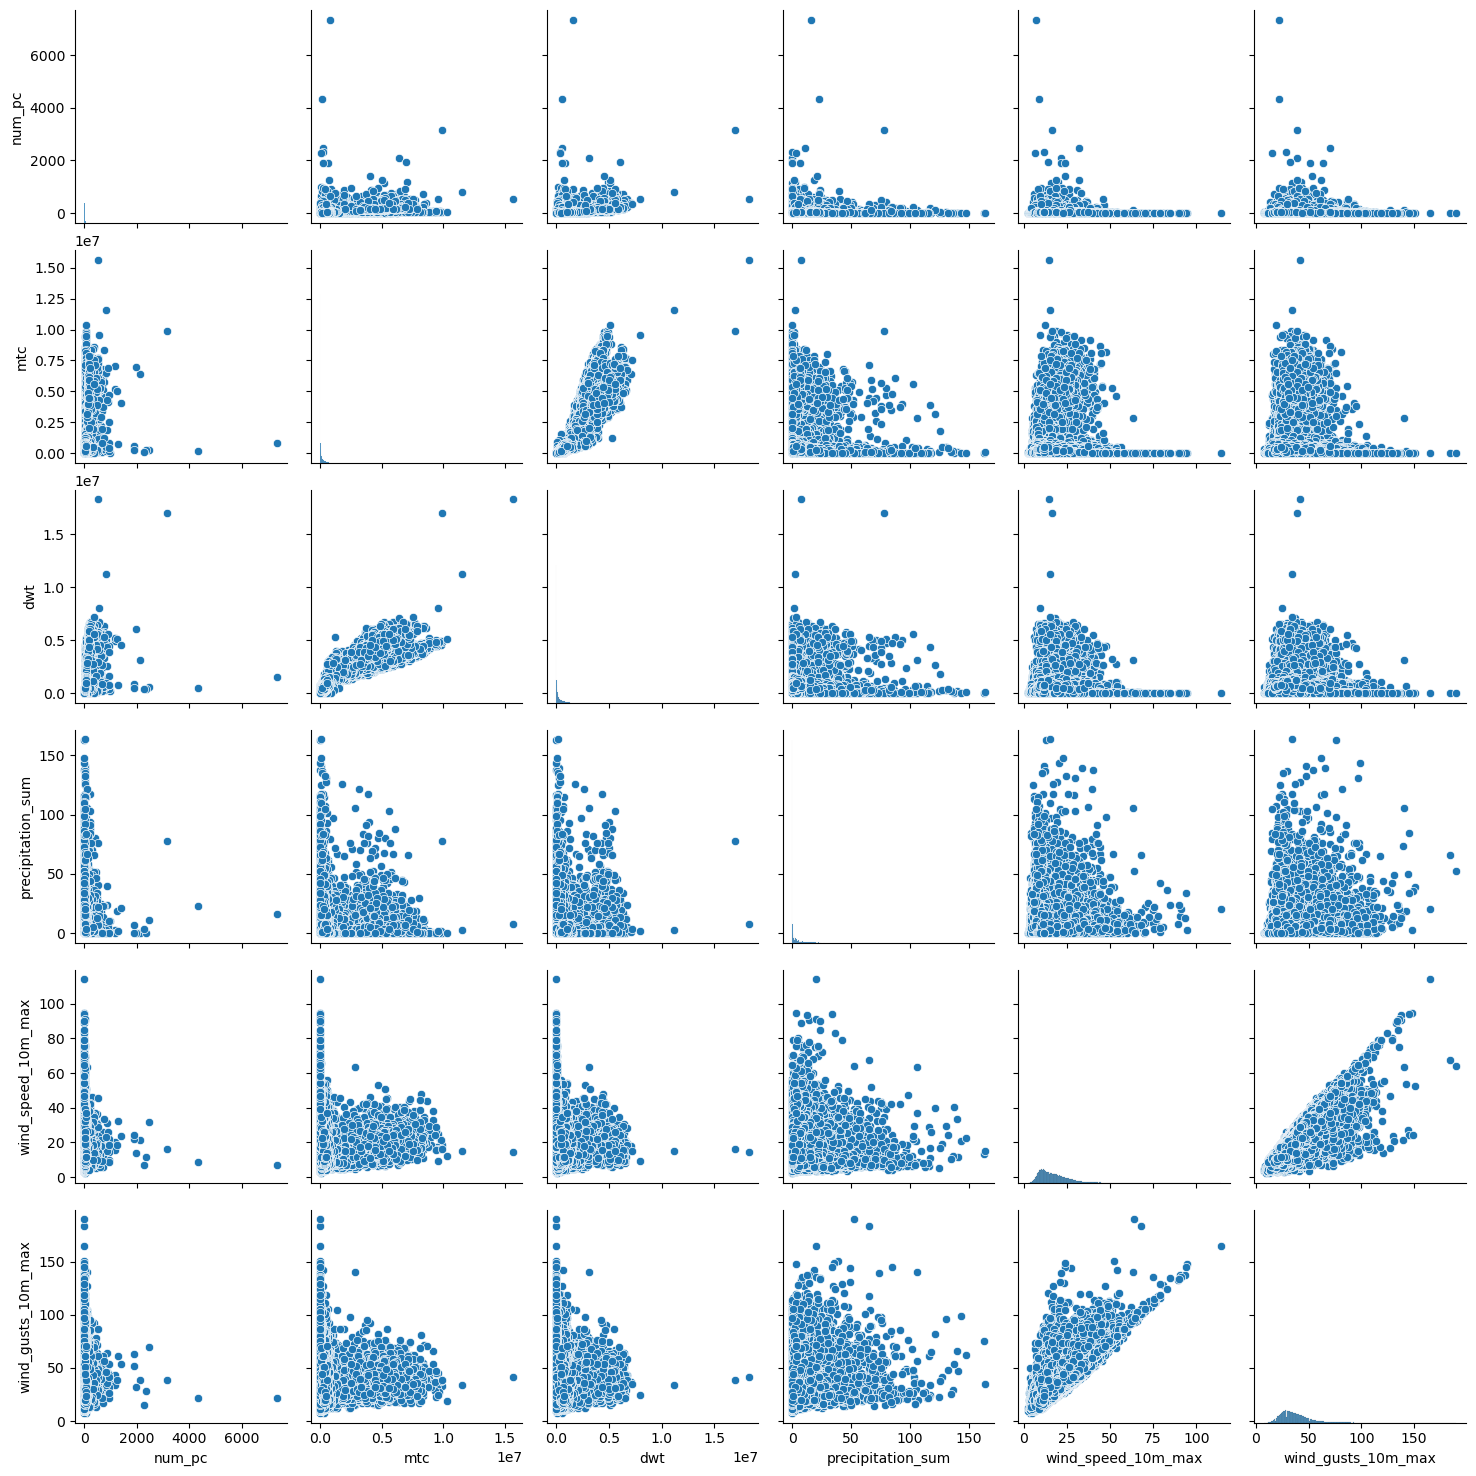

In [46]:
# Export pair  weather plots
export_sub = export_weather_numerical[['num_pc', 'mtc', 'dwt', 'precipitation_sum', 'wind_speed_10m_max', 'wind_gusts_10m_max']]

export_pair = sns.pairplot(export_sub)

Strongest Relationships
* num_port_calls vs. metric_tons_capacity and deadweight_tonnage: Clear positive linear correlation. More port calls generally mean higher metric tonnage and deadweight tonnage.

Distribution of Variables
* Trade values (primary_trade_value): Highly skewed to the right, meaning that a few data points have significantly higher trade values than the majority.
* Weather variables (total_precipitation, total_rainfall, max_wind_speed_10m, max_wind_gusts_10m): Show more normally distributed patterns, except for precipitation, which has many zero values.

Outliers and Potential Issues
* Some extreme values in trade value and port activity stand out, which might be specific high-volume ports or unique trade events.
* Precipitation and wind speed do not seem to show strong relationships with trade activity, but their impact may be more evident on a seasonal basis rather than in this aggregated format.

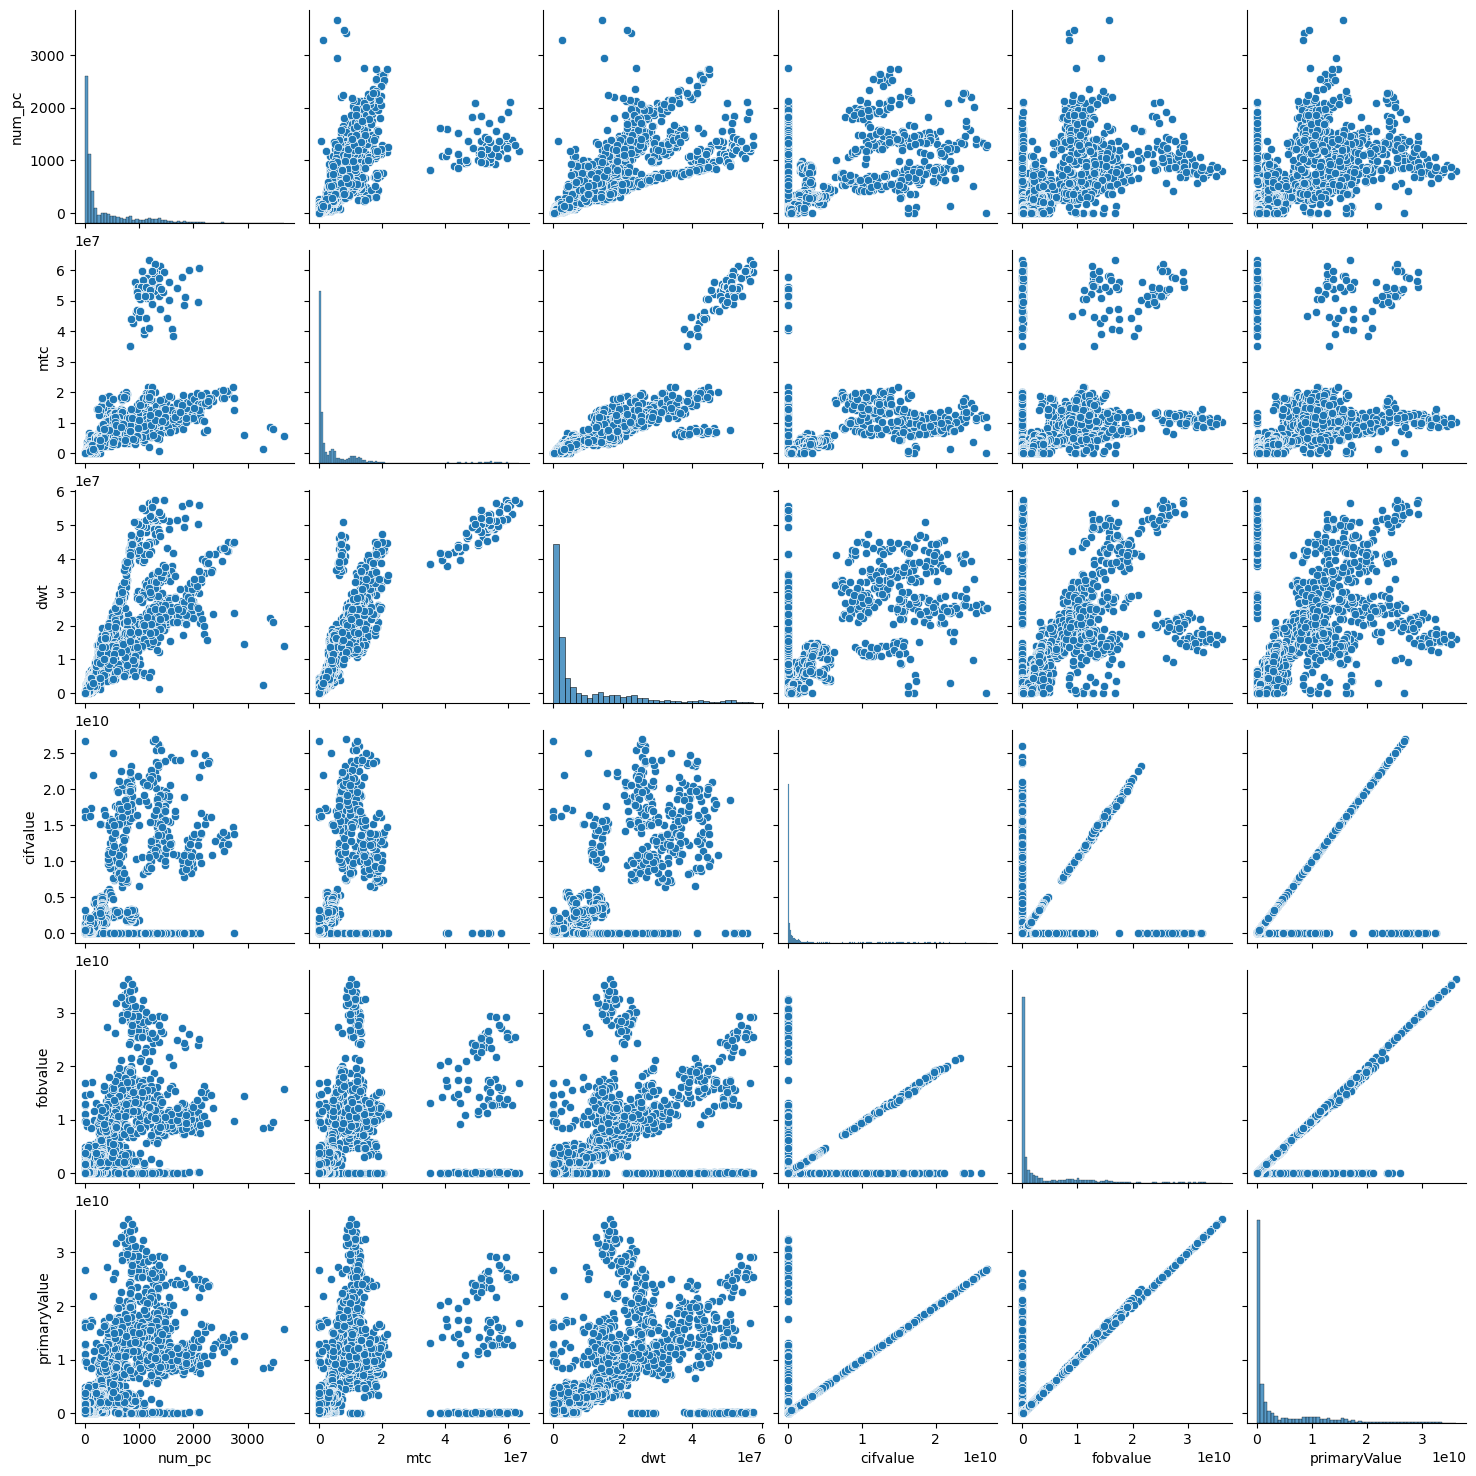

In [47]:
# Port/trade pair  plots
trade_sub = port_trade_numerical[['num_pc', 'mtc', 'dwt', 'cifvalue', 'fobvalue', 'primaryValue']]

trade_pair = sns.pairplot(trade_sub)

Strong Correlations:

* Metric tons capacity & deadweight tonnage: These two variables are highly correlated, suggesting that the carrying capacity of vessels strongly influences total weight transported.
* Number of port calls & metric tons capacity: A clear linear trend indicates that more vessel traffic is associated with higher cargo capacity.
* Deadweight tonnage and number of port calls: there is a clear linear trends that indicates that more vessel traffic is associated with more tonnage.

Weak Relationships
* primary_trade_value vs. num_port_calls: A weaker correlation than seen in imports, likely due to variations in how exports function across different ports.

Variables to Explore Further
* Trade value vs. Number of port calls: Understanding whether an increase in port activity directly leads to higher trade volume.
* Trade value vs. precipitation: Although no obvious trend appears, checking specific countries or extreme events could reveal hidden patterns.
* Outliers in precipitation & trade value: Some extreme points in the dataset could indicate unique cases where weather had a major impact on trade.

### Categorical analysis

Now that we’ve explored the correlation analysis, it’s time to move on to categorical analysis and visualizations. This will help us uncover deeper insights into the relationships between categorical variables (e.g., country, vessel_type, season) and key metrics (e.g., num_pc, mtc, primaryValue).
As we have seen that weather and port data has weak correlations with port data I will focus mainly into deepening the understanding of port data.

We’ll focus on the following categorical variables and their relationships with trade and port activity:

a. Seasons
* Hypothesis: Trade volumes and port activity fluctuate seasonally.

* New Column: Create a season column based on the date column.

    - Winter: December, January, February

    - Spring: March, April, May

    - Summer: June, July, August

    - Fall: September, October, November

b. Vessel Types
* Hypothesis: Different vessel types (e.g., oil tankers, container ships) handle different trade volumes and port activity.

* New Column: Use the existing vessel_type column.

c. Ship Size
* Hypothesis: Larger ships (higher dwt) handle more cargo and have higher trade values.

* New Column: Categorize ships into size groups (e.g., small, medium, large) based on dwt.

d. Country Groups
* Hypothesis: Trade activity varies by country or region.

* New Column: Group countries by region (e.g., Europe, Asia, Africa) or economic status (e.g., developed, developing).



In [48]:
def get_season(date):
    month = date.month
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

port_data['season'] = port_data['date'].apply(get_season)

In [49]:
port_data['season'].head()

0    Spring
1    Spring
2    Spring
3    Spring
4    Spring
Name: season, dtype: object

In [50]:
def get_ship_size(dwt):
    if dwt == 0:
        return 'Unknown'
    elif dwt < 10000:
        return 'Small'
    elif dwt < 50000:
        return 'Medium'
    else:
        return 'Large'

port_data['ship_size'] = port_data['dwt'].apply(get_ship_size)

port_data['ship_size'].head()

0    Unknown
1    Unknown
2    Unknown
3    Unknown
4    Unknown
Name: ship_size, dtype: object

In [51]:
country_to_region = {
    # Africa
    'Algeria': 'Africa',
    'Angola': 'Africa',
    'Benin': 'Africa',
    'Botswana': 'Africa',
    'Cameroon': 'Africa',
    'Cabo Verde': 'Africa',
    'Dem. Rep. of the Congo': 'Africa',
    'Congo': 'Africa',
    "Côte d'Ivoire": 'Africa',
    'Djibouti': 'Africa',
    'Egypt': 'Africa',
    'Eritrea': 'Africa',
    'Ethiopia': 'Africa',
    'Gabon': 'Africa',
    'Gambia': 'Africa',
    'Ghana': 'Africa',
    'Guinea': 'Africa',
    'Guinea-Bissau': 'Africa',
    'Kenya': 'Africa',
    'Liberia': 'Africa',
    'Libya': 'Africa',
    'Madagascar': 'Africa',
    'Malawi': 'Africa',
    'Mali': 'Africa',
    'Mauritania': 'Africa',
    'Mauritius': 'Africa',
    'Morocco': 'Africa',
    'Mozambique': 'Africa',
    'Namibia': 'Africa',
    'Niger': 'Africa',
    'Nigeria': 'Africa',
    'Rwanda': 'Africa',
    'Senegal': 'Africa',
    'Seychelles': 'Africa',
    'Sierra Leone': 'Africa',
    'Somalia': 'Africa',
    'South Africa': 'Africa',
    'Sudan': 'Africa',
    'Tanzania': 'Africa',
    'Togo': 'Africa',
    'Tunisia': 'Africa',
    'Uganda': 'Africa',
    'Zambia': 'Africa',
    'Zimbabwe': 'Africa',

    # Asia
    'Afghanistan': 'Asia',
    'Armenia': 'Asia',
    'Azerbaijan': 'Asia',
    'Bahrain': 'Asia',
    'Bangladesh': 'Asia',
    'Bhutan': 'Asia',
    'Brunei Darussalam': 'Asia',
    'Cambodia': 'Asia',
    'China': 'Asia',
    'China, Hong Kong SAR': 'Asia',
    'China, Macao SAR': 'Asia',
    'India': 'Asia',
    'Indonesia': 'Asia',
    'Iran': 'Asia',
    'Iraq': 'Asia',
    'Israel': 'Asia',
    'Japan': 'Asia',
    'Jordan': 'Asia',
    'Kazakhstan': 'Asia',
    'Kuwait': 'Asia',
    'Kyrgyzstan': 'Asia',
    'Laos': 'Asia',
    'Lebanon': 'Asia',
    'Malaysia': 'Asia',
    'Maldives': 'Asia',
    'Mongolia': 'Asia',
    'Myanmar': 'Asia',
    'Nepal': 'Asia',
    'North Korea': 'Asia',
    'Oman': 'Asia',
    'Pakistan': 'Asia',
    'Philippines': 'Asia',
    'Qatar': 'Asia',
    'Saudi Arabia': 'Asia',
    'Singapore': 'Asia',
    'South Korea': 'Asia',
    'Sri Lanka': 'Asia',
    'Syria': 'Asia',
    'Taiwan, Province of China': 'Asia',
    'Tajikistan': 'Asia',
    'Thailand': 'Asia',
    'Timor-Leste': 'Asia',
    'Turkmenistan': 'Asia',
    'United Arab Emirates': 'Asia',
    'Uzbekistan': 'Asia',
    'Viet Nam': 'Asia',
    'Yemen': 'Asia',

    # Europe
    'Albania': 'Europe',
    'Andorra': 'Europe',
    'Austria': 'Europe',
    'Belarus': 'Europe',
    'Belgium': 'Europe',
    'Bosnia and Herzegovina': 'Europe',
    'Bulgaria': 'Europe',
    'Croatia': 'Europe',
    'Cyprus': 'Europe',
    'Czech Republic': 'Europe',
    'Denmark': 'Europe',
    'Estonia': 'Europe',
    'Finland': 'Europe',
    'France': 'Europe',
    'Georgia': 'Europe',
    'Germany': 'Europe',
    'Greece': 'Europe',
    'Hungary': 'Europe',
    'Iceland': 'Europe',
    'Ireland': 'Europe',
    'Italy': 'Europe',
    'Kosovo': 'Europe',
    'Latvia': 'Europe',
    'Liechtenstein': 'Europe',
    'Lithuania': 'Europe',
    'Luxembourg': 'Europe',
    'Malta': 'Europe',
    'Moldova': 'Europe',
    'Monaco': 'Europe',
    'Montenegro': 'Europe',
    'Netherlands': 'Europe',
    'North Macedonia': 'Europe',
    'Norway': 'Europe',
    'Poland': 'Europe',
    'Portugal': 'Europe',
    'Romania': 'Europe',
    'Russia': 'Europe',
    'San Marino': 'Europe',
    'Serbia': 'Europe',
    'Slovakia': 'Europe',
    'Slovenia': 'Europe',
    'Spain': 'Europe',
    'Sweden': 'Europe',
    'Switzerland': 'Europe',
    'Türkiye': 'Europe',
    'Ukraine': 'Europe',
    'United Kingdom': 'Europe',
    'Vatican City': 'Europe',

    # North America
    'Antigua and Barbuda': 'North America',
    'Bahamas': 'North America',
    'Barbados': 'North America',
    'Belize': 'North America',
    'Canada': 'North America',
    'Costa Rica': 'North America',
    'Cuba': 'North America',
    'Dominica': 'North America',
    'Dominican Republic': 'North America',
    'El Salvador': 'North America',
    'Grenada': 'North America',
    'Guatemala': 'North America',
    'Haiti': 'North America',
    'Honduras': 'North America',
    'Jamaica': 'North America',
    'Mexico': 'North America',
    'Nicaragua': 'North America',
    'Panama': 'North America',
    'Saint Kitts and Nevis': 'North America',
    'Saint Lucia': 'North America',
    'Saint Vincent and the Grenadines': 'North America',
    'Trinidad and Tobago': 'North America',
    'USA': 'North America',

    # South America
    'Argentina': 'South America',
    'Bolivia': 'South America',
    'Brazil': 'South America',
    'Chile': 'South America',
    'Colombia': 'South America',
    'Ecuador': 'South America',
    'Guyana': 'South America',
    'Paraguay': 'South America',
    'Peru': 'South America',
    'Suriname': 'South America',
    'Uruguay': 'South America',
    'Venezuela': 'South America',

    # Oceania
    'Australia': 'Oceania',
    'Fiji': 'Oceania',
    'Kiribati': 'Oceania',
    'Marshall Islands': 'Oceania',
    'Micronesia': 'Oceania',
    'Nauru': 'Oceania',
    'New Zealand': 'Oceania',
    'Palau': 'Oceania',
    'Papua New Guinea': 'Oceania',
    'Samoa': 'Oceania',
    'Solomon Islands': 'Oceania',
    'Tonga': 'Oceania',
    'Tuvalu': 'Oceania',
    'Vanuatu': 'Oceania',

    # Middle East
    'Bahrain': 'Middle East',
    'Iran': 'Middle East',
    'Iraq': 'Middle East',
    'Israel': 'Middle East',
    'Jordan': 'Middle East',
    'Kuwait': 'Middle East',
    'Lebanon': 'Middle East',
    'Oman': 'Middle East',
    'Qatar': 'Middle East',
    'Saudi Arabia': 'Middle East',
    'Syria': 'Middle East',
    'United Arab Emirates': 'Middle East',
    'Yemen': 'Middle East',

    # Caribbean
    'Antigua and Barbuda': 'Caribbean',
    'Bahamas': 'Caribbean',
    'Barbados': 'Caribbean',
    'Cuba': 'Caribbean',
    'Dominica': 'Caribbean',
    'Dominican Republic': 'Caribbean',
    'Grenada': 'Caribbean',
    'Haiti': 'Caribbean',
    'Jamaica': 'Caribbean',
    'Saint Kitts and Nevis': 'Caribbean',
    'Saint Lucia': 'Caribbean',
    'Saint Vincent and the Grenadines': 'Caribbean',
    'Trinidad and Tobago': 'Caribbean',
    'Cayman Isds': 'Caribbean'
}

port_data['region'] = port_data['country'].map(country_to_region)

print(port_data[['country', 'region']].head())

       country     region
0  Cayman Isds  Caribbean
1  Cayman Isds  Caribbean
2  Cayman Isds  Caribbean
3  Cayman Isds  Caribbean
4  Cayman Isds  Caribbean


In [52]:
# Filter out rows where vessel_type is 'Total'
filtered_data = port_data[port_data['vessel_type'] != 'Total']

# Group by vessel_type and calculate mean values
vessel_trends = filtered_data.groupby('vessel_type').agg({
    'num_pc': 'mean',
    'num_pc_ma': 'mean',
    'mtc': 'mean',
    'dwt': 'mean'
}).reset_index()

print(vessel_trends)

               vessel_type     num_pc  num_pc_ma           mtc            dwt
0                     Bulk   4.188770   4.177904  83371.005526  200181.475614
1  Container/general cargo  11.801582  11.848351  48225.032987  258442.658051
2                Foodstuff   0.534130   0.535233    690.561348    3609.436673
3                  LPG/LNG   1.258157   1.255087   7606.290329   29528.170925
4            Oil/chemicals   5.189673   5.230439  39466.304746  126405.772982
5                 Vehicles   3.026220   3.008180   2874.077526   29353.941897


In [53]:
# Group by ship size
ship_size_trends = port_data.groupby('ship_size').agg({
    'num_pc': 'mean',
    'num_pc_ma': 'mean',
    'mtc': 'mean',
    'dwt': 'mean'
}).reset_index()
print(ship_size_trends)

  ship_size     num_pc  num_pc_ma            mtc            dwt
0     Large  28.396651  27.693591  291703.778125  741125.501246
1    Medium   2.319176   2.075590    7643.943289   26800.274930
2     Small   1.652839   1.185532    1845.646574    5592.079636
3   Unknown   0.000000   0.461921       0.000000       0.000000


In [54]:
# Group by region
region_trends = port_data.groupby('region').agg({
    'num_pc': 'mean',
    'num_pc_ma': 'mean',
    'mtc': 'mean',
    'dwt': 'mean'
}).reset_index()
print(region_trends)

          region     num_pc  num_pc_ma            mtc            dwt
0         Africa   0.947390   0.948162    8802.181566   26347.880555
1           Asia  10.331971  10.212770  132690.601630  303755.827932
2      Caribbean   0.521631   0.522954    3545.447819   12883.022367
3         Europe   6.280904   6.288148   36489.466633  100305.495018
4    Middle East   3.098982   3.096480   47726.979238  128001.687579
5  North America   4.516633   4.474748   50708.488358  143306.472034
6        Oceania   3.499956   3.494616  173809.710793  194919.756618
7  South America   2.673528   2.666790   48093.821814   98183.726563


In [55]:
# Group by season
seasonal_trends = port_data.groupby('season').agg({
    'num_pc': 'mean',
    'num_pc_ma': 'mean',
    'mtc': 'mean',
    'dwt': 'mean'
}).reset_index()
print(seasonal_trends)

   season    num_pc  num_pc_ma           mtc            dwt
0    Fall  8.149388   8.135529  78715.883751  200607.893922
1  Spring  7.980708   7.957266  79701.403692  203843.044438
2  Summer  8.115143   8.152525  80133.140563  205958.948283
3  Winter  7.391597   7.398533  74077.356079  187938.750975


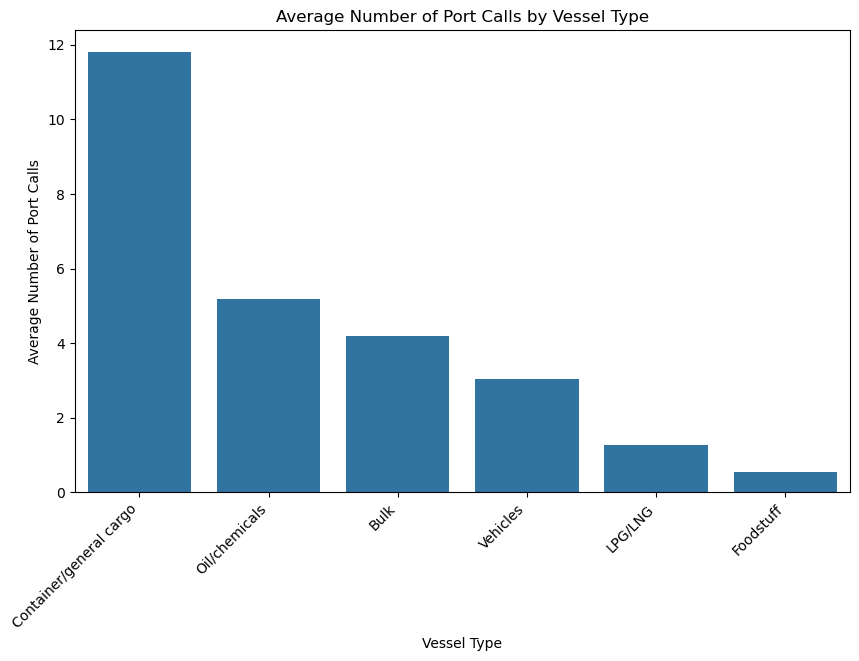

In [86]:
vessel_trends = vessel_trends.sort_values(by='num_pc', ascending=False)

plt.figure(figsize=(10, 6))
vessel_bar = sns.barplot(x='vessel_type', y='num_pc', data=vessel_trends)
plt.title('Average Number of Port Calls by Vessel Type')
plt.xlabel('Vessel Type')
plt.ylabel('Average Number of Port Calls')
plt.xticks(rotation=45, ha='right')
plt.savefig('/Users/bobbi/Careerfoundry/Shipping_project/04 Analysis/Visualizations/vessel_bar.png')

plt.show()

Why Do General Cargo, Oil/Chemical Tankers, and Bulk Carriers Have the Highest Port Calls?
1. General Cargo
These vessels can carry a wide range of goods, making them ideal for serving multiple ports with diverse cargo needs. They often operate on shorter routes and serve smaller ports that larger vessels cannot access.

2. Oil/Chemical Tankers
Refined products (e.g., gasoline, diesel, chemicals) are often distributed to multiple locations, requiring frequent port calls. Transporting hazardous materials may require specialized handling at multiple ports.

3. Bulk Carriers
Bulk carriers transport raw materials (e.g., coal, grain, iron ore) that are often sourced from and delivered to multiple locations. These vessels are designed for frequent loading/unloading of bulk commodities.

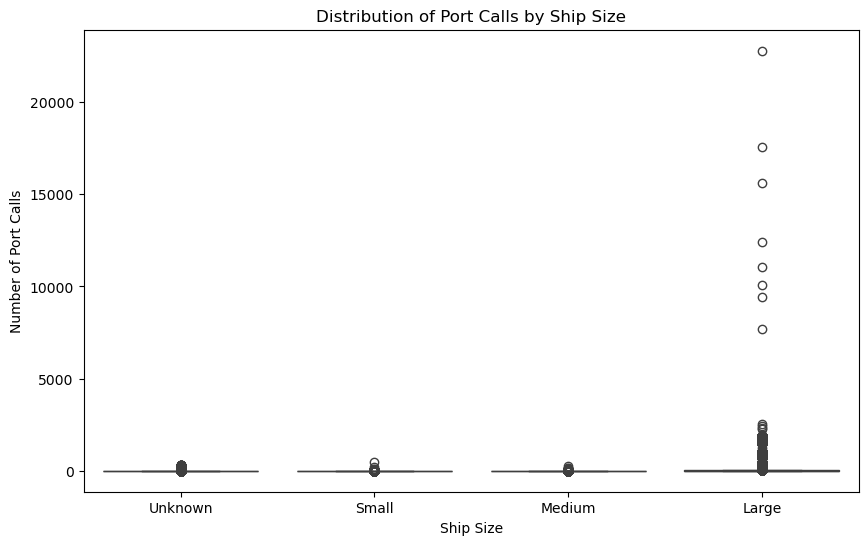

In [57]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='ship_size', y='num_pc_ma', data=port_data)
plt.title('Distribution of Port Calls by Ship Size')
plt.xlabel('Ship Size')
plt.ylabel('Number of Port Calls')
plt.show()

Large ships dominate port activity, accounting for a significant portion of port calls due to their capacity to transport large volumes of cargo. However, the high variability in their port call frequency indicates that not all large ships operate similarly. Some may have exceptionally high port call frequencies, possibly due to their involvement in specific trade networks or cargo types. This variability highlights the diverse roles that large ships play in global trade, from long-haul routes to frequent distribution stops.

Small ships are less active in terms of port calls, likely because they operate on shorter routes or carry smaller cargo loads. Their lower activity suggests that they serve niche markets or smaller ports, complementing the role of larger vessels in global trade networks. While they may not contribute as significantly to overall port activity, they are essential for connecting smaller or remote locations to larger trade hubs.

Unknown ships remain a mystery, with low port call activity and unclear reasons for their unrecorded size. This category warrants further investigation to determine whether the lack of size data impacts their role in trade. Are these vessels less active because of their size, or is their size unknown due to data collection issues? Understanding this category could reveal insights into data quality or uncover hidden patterns in global shipping activity.

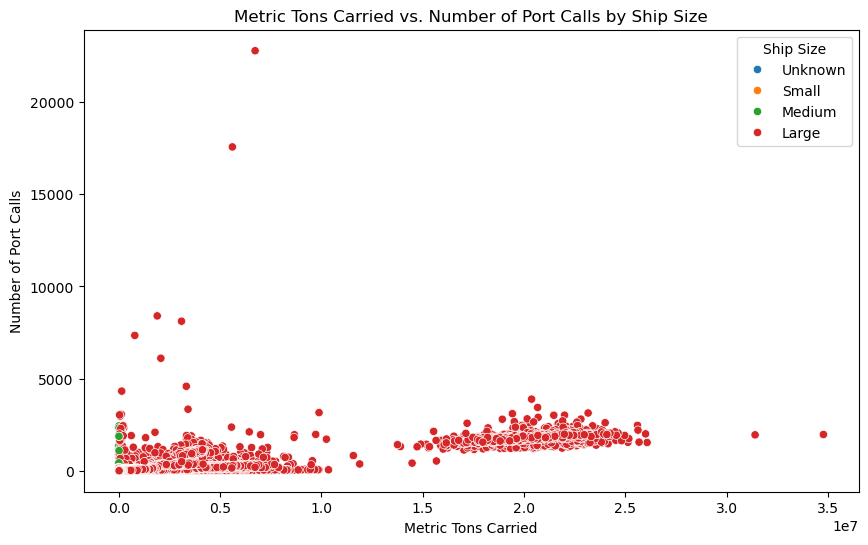

In [58]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='mtc', y='num_pc', hue='ship_size', data=port_data)
plt.title('Metric Tons Carried vs. Number of Port Calls by Ship Size')
plt.xlabel('Metric Tons Carried')
plt.ylabel('Number of Port Calls')
plt.legend(title='Ship Size')
plt.show()

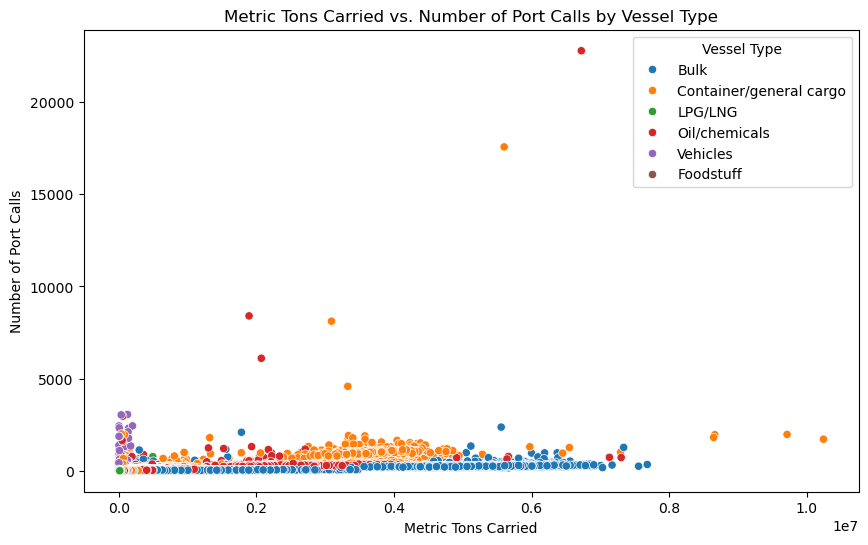

In [59]:
filter_vessel = port_data[port_data['vessel_type'] != 'Total']

plt.figure(figsize=(10, 6))
sns.scatterplot(x='mtc', y='num_pc', hue='vessel_type', data=filter_vessel)
plt.title('Metric Tons Carried vs. Number of Port Calls by Vessel Type')
plt.xlabel('Metric Tons Carried')
plt.ylabel('Number of Port Calls')
plt.legend(title='Vessel Type')
plt.show()

/var/folders/bs/25x482152nx68y1wp8l2g42c0000gn/T/ipykernel_73657/927624212.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Vessel Type')


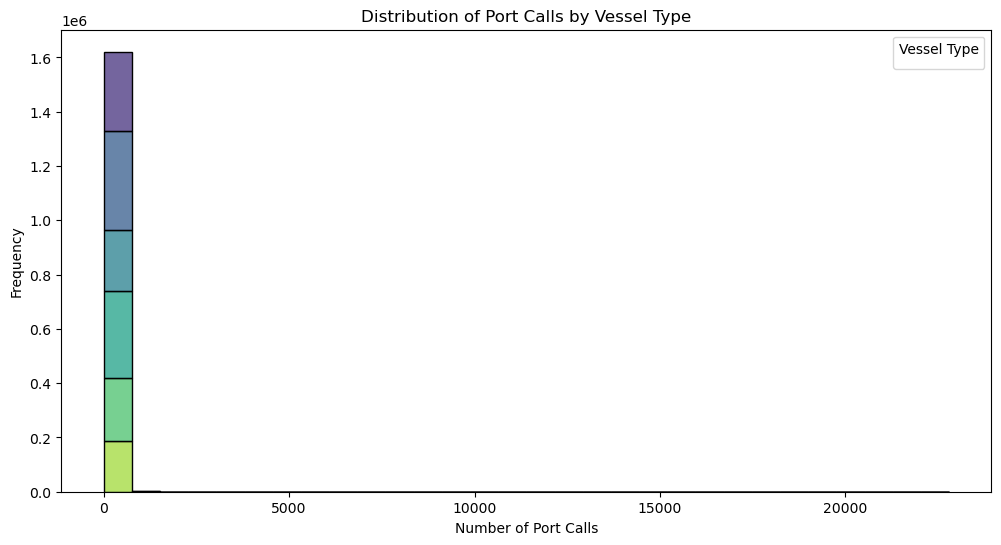

In [60]:
plt.figure(figsize=(12, 6))
sns.histplot(data=filter_vessel, x='num_pc_ma', hue='vessel_type', multiple='stack', bins=30, palette='viridis')
plt.title('Distribution of Port Calls by Vessel Type')
plt.xlabel('Number of Port Calls')
plt.ylabel('Frequency')
plt.legend(title='Vessel Type')
plt.show()

This show that we have to normalize our data and do something about our outliers

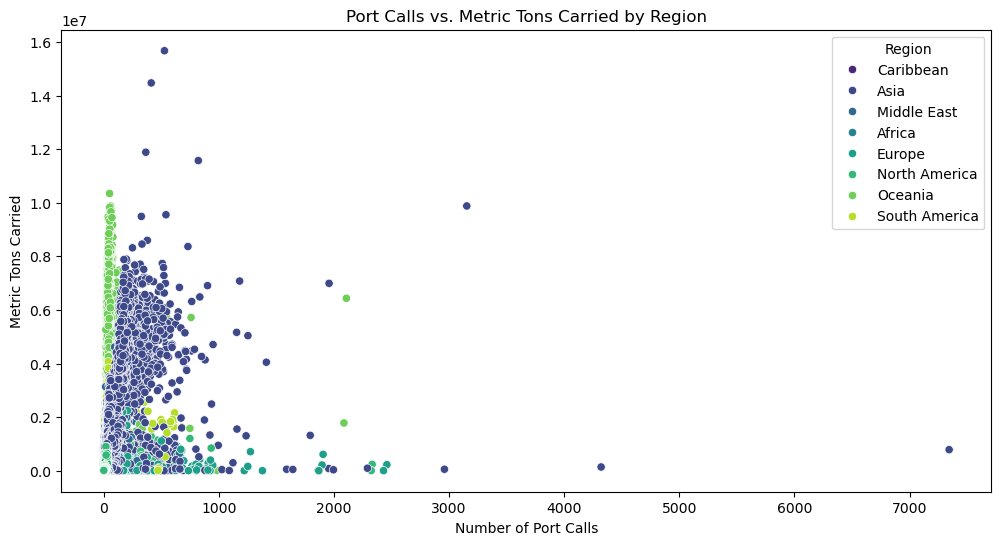

In [61]:
# Create a scatter plot of port calls vs. metric tons carried
plt.figure(figsize=(12, 6))
sns.scatterplot(x='num_pc', y='mtc', hue='region', data=port_data, palette='viridis')
plt.title('Port Calls vs. Metric Tons Carried by Region')
plt.xlabel('Number of Port Calls')
plt.ylabel('Metric Tons Carried')
plt.legend(title='Region')
plt.show()

/var/folders/bs/25x482152nx68y1wp8l2g42c0000gn/T/ipykernel_73657/1767405953.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  region_bar = sns.barplot(x='region', y='num_pc', data=region_trends, palette='viridis')


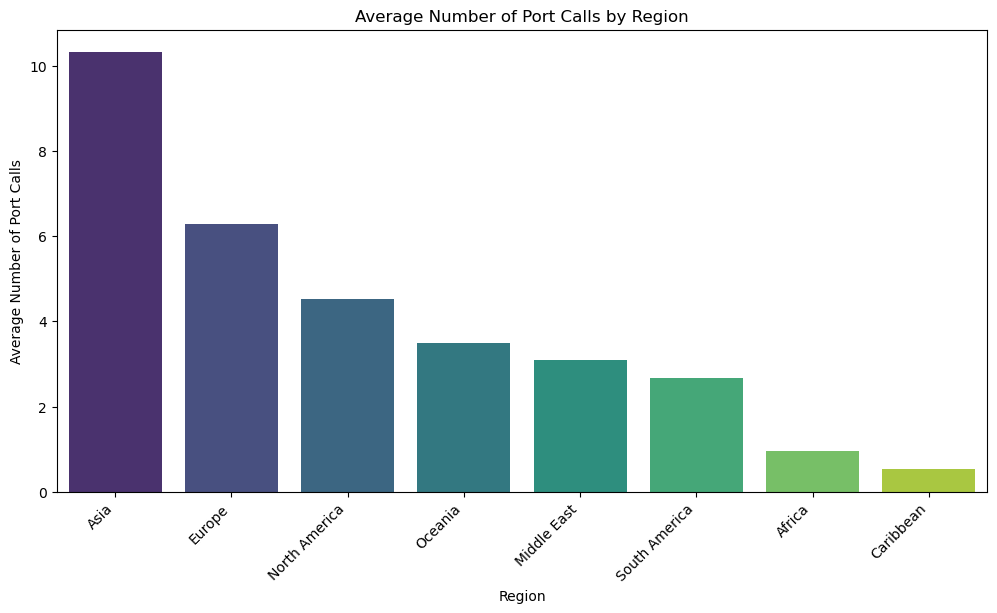

In [88]:
region_trends = region_trends.sort_values(by='num_pc', ascending=False)
# Create a bar plot of average port calls by region
plt.figure(figsize=(12, 6))
region_bar = sns.barplot(x='region', y='num_pc', data=region_trends, palette='viridis')
plt.title('Average Number of Port Calls by Region')
plt.xlabel('Region')
plt.ylabel('Average Number of Port Calls')
plt.xticks(rotation=45, ha='right')
plt.savefig('/Users/bobbi/Careerfoundry/Shipping_project/04 Analysis/Visualizations/region_bar.png')
plt.show()

The bar plot visualizes the average number of port calls by region, revealing key insights into global trade patterns. Regions with taller bars, such as Asia, demonstrate significantly higher port activity, reflecting their role as global trade hubs. Asia's dominance is driven by major ports like Shanghai, Singapore, and Hong Kong, which handle large volumes of cargo and serve as critical nodes in global shipping networks. This high port activity underscores Asia's central role in manufacturing and exports, contributing to its economic strength and global influence.

In contrast, regions with shorter bars, such as Oceania, show lower average port calls. This is likely due to factors like smaller populations, fewer major ports, and a focus on specific types of cargo, such as raw materials or agricultural products. Similarly, regions like Africa and South America exhibit lower port activity, which may reflect challenges in infrastructure development, trade capacity, or economic diversification. These regions could benefit from investments in port infrastructure and trade networks to boost their global trade participation.

The plot also highlights the economic impact of port activity. Regions with high port calls, such as Europe and North America, likely experience significant economic benefits, including job creation, increased revenue, and improved logistics. On the other hand, regions with lower port activity may need to prioritize infrastructure development and trade policies to enhance their competitiveness in global markets. Overall, the visualization underscores the uneven distribution of port activity across regions and the importance of ports as drivers of economic growth and global trade connectivity.

/var/folders/bs/25x482152nx68y1wp8l2g42c0000gn/T/ipykernel_73657/1705070335.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='season', y='num_pc', data=seasonal_trends, palette='viridis')


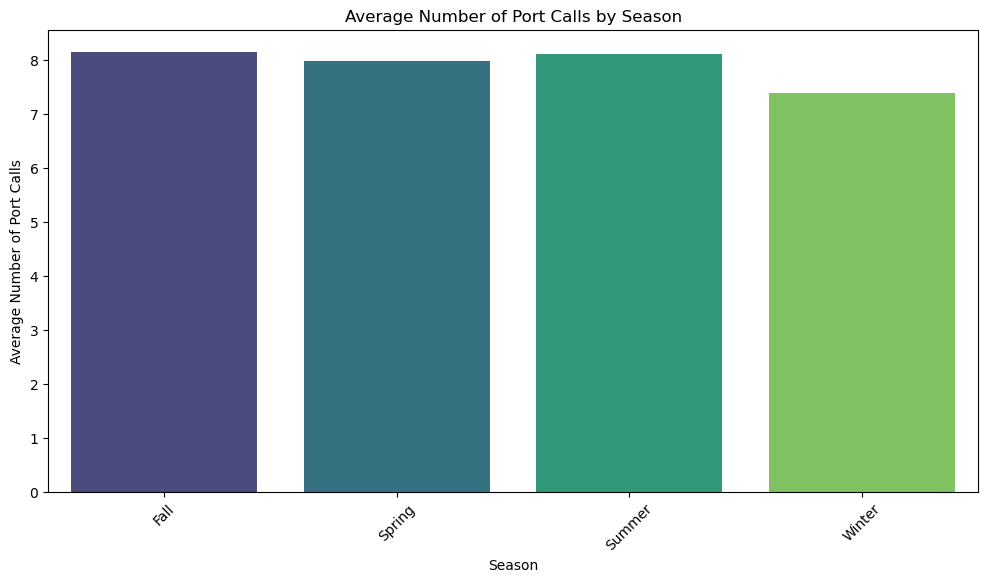

In [63]:
# Create a bar plot of average port calls by region
plt.figure(figsize=(12, 6))
sns.barplot(x='season', y='num_pc', data=seasonal_trends, palette='viridis')
plt.title('Average Number of Port Calls by Season')
plt.xlabel('Season')
plt.ylabel('Average Number of Port Calls')
plt.xticks(rotation=45)
plt.show()

The lack of significant variation in port calls across seasons suggests that global trade is not heavily influenced by seasonal factors in this dataset. This could indicate that the majority of trade involves non-seasonal goods, such as manufactured products, electronics, or raw materials with steady demand year-round.

Stable port activity implies that supply chains are well-balanced, with consistent production, shipping, and consumption patterns throughout the year. This is common in regions or industries that rely on globalized trade networks, where demand is distributed evenly across seasons.

If weather conditions or operational challenges (e.g., storms, port closures) do not significantly disrupt shipping, port activity can remain stable. This is more likely in regions with mild climates or well-developed infrastructure that mitigates seasonal disruptions.


The dataset might focus on specific types of trade (e.g., container shipping) that are less affected by seasonality compared to others (e.g., agricultural or energy exports). Alternatively, the dataset might aggregate data across many regions, smoothing out seasonal variations that are more pronounced at a local level.

In [64]:
# Import
import_port_trade = port_trade_data[port_trade_data['flowCode'] == "M"]

# Export
export_port_trade = port_trade_data[port_trade_data['flowCode'] == "X"]

/var/folders/bs/25x482152nx68y1wp8l2g42c0000gn/T/ipykernel_73657/3805864935.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=sorted_data, x="primaryValue", y="country", ci=None)


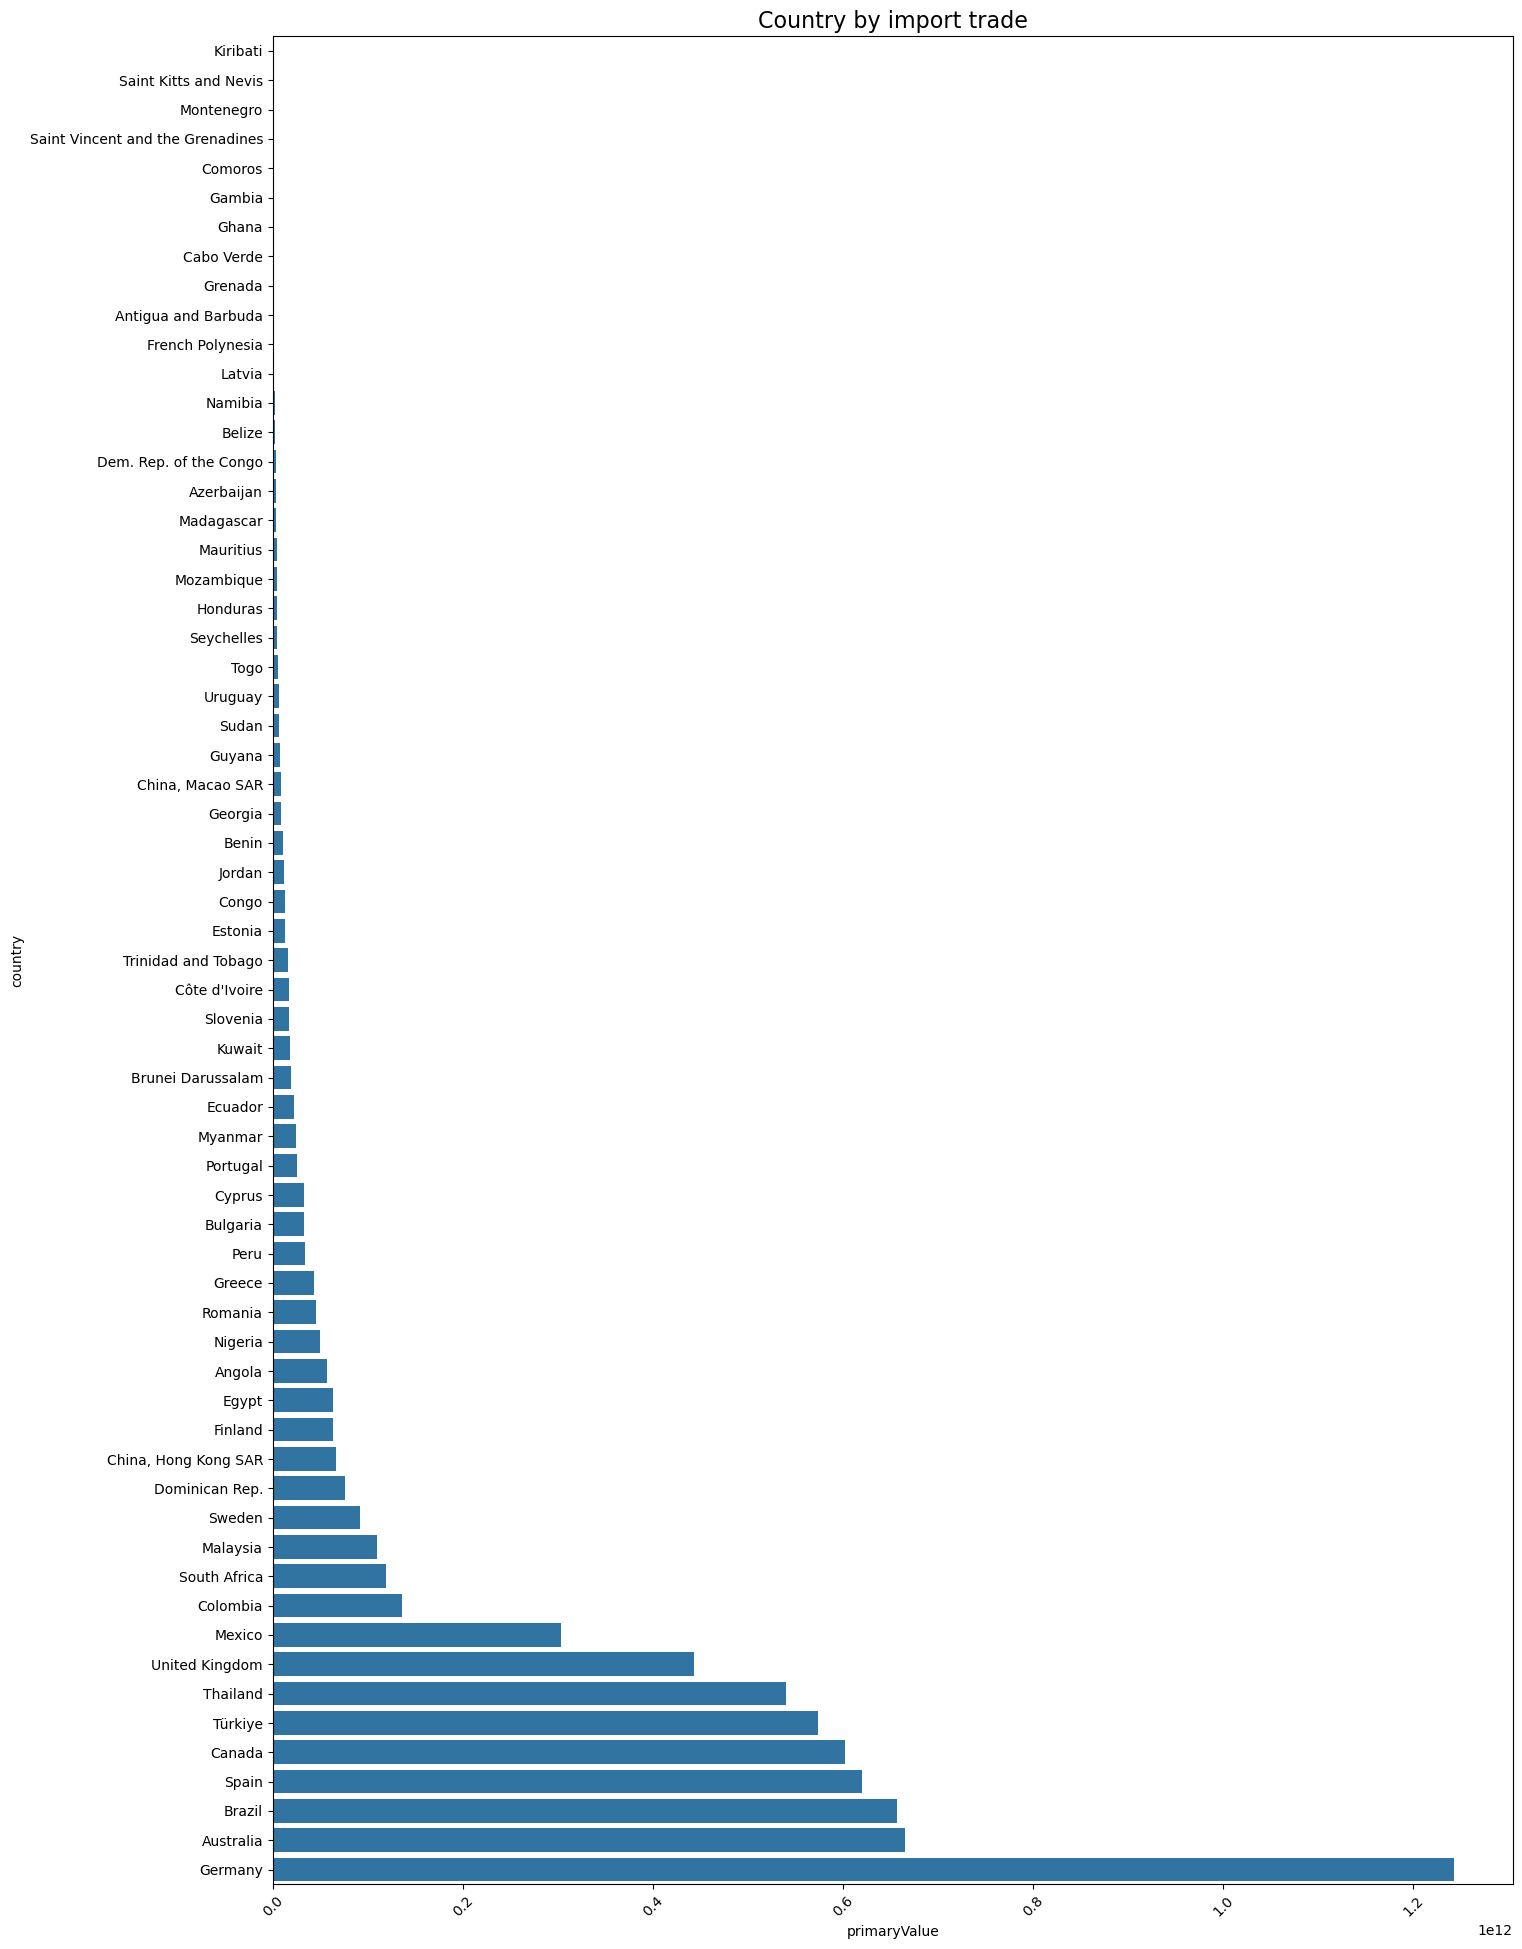

In [65]:
# Import data histogram
sorted_data = import_port_trade.groupby("country", as_index=False)["primaryValue"].sum()
sorted_data = sorted_data.sort_values(by="primaryValue", ascending=True)

plt.figure(figsize=(16, 24))
sns.barplot(data=sorted_data, x="primaryValue", y="country", ci=None)
plt.xticks(rotation=45)
plt.title("Country by import trade", fontsize=16)
plt.show()

/var/folders/bs/25x482152nx68y1wp8l2g42c0000gn/T/ipykernel_73657/882056860.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=sorted_export, x="primaryValue", y="country", ci=None)


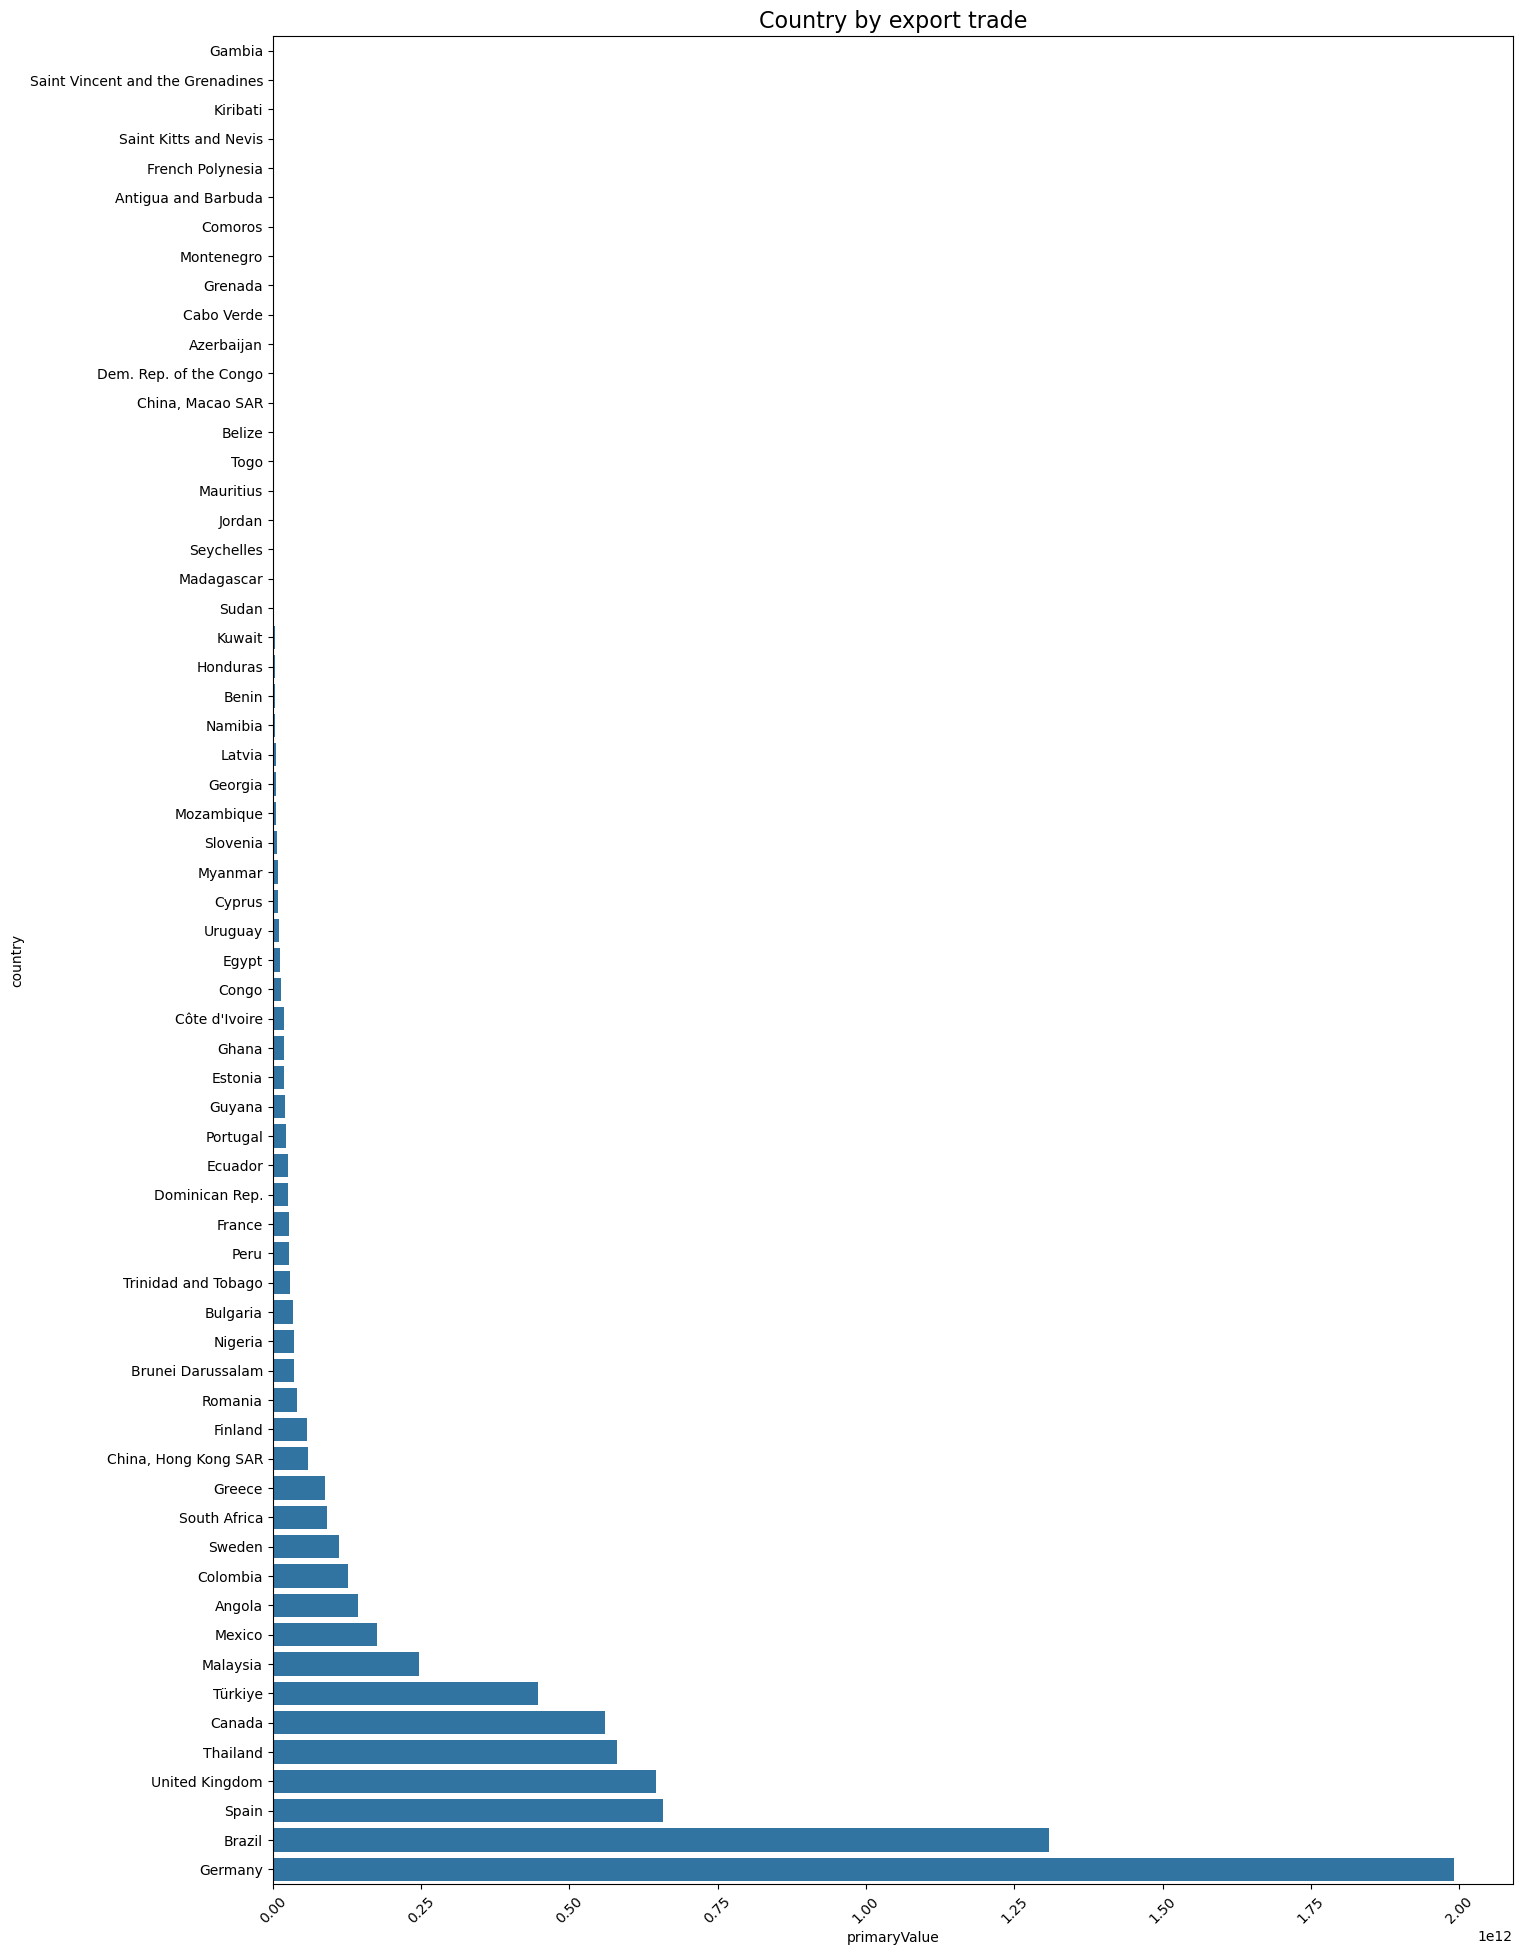

In [66]:
# Import data histogram
sorted_export = export_port_trade.groupby("country", as_index=False)["primaryValue"].sum()
sorted_export = sorted_export.sort_values(by="primaryValue", ascending=True)

plt.figure(figsize=(16, 24))
sns.barplot(data=sorted_export, x="primaryValue", y="country", ci=None)
plt.xticks(rotation=45)
plt.title("Country by export trade", fontsize=16)
plt.show()

Primary Trade Value by Country (import)

This bar chart visualises the total primary trade value for each country, sorted in descending order.
Germany, the USA, and Brazil show the highest trade values, indicating their significance in global trade.
The distribution is heavily skewed, with a few countries accounting for a large portion of trade value, while many others contribute much smaller amounts.
Countries at the lower end of the chart, such as Azerbaijan, New Zealand, and Mauritius, have comparatively lower trade activity, possibly due to smaller economies, fewer exports/imports, or geographic constraints.

Primary Trade Value by Country (export)

This histogram also represents primary trade value, but with slight variations in data representation.
The ranking of countries is consistent, reinforcing the trend that a few major economies dominate global trade.
The sharp decline in trade value after the top-ranking countries highlights the trade disparity between global economic powerhouses and smaller nations.

In [67]:
trade_efficiency = port_trade_data.groupby('country').agg({
    'num_pc': 'sum',  # Total number of port calls
    'primaryValue': 'sum'  # Total trade value
}).reset_index()

In [68]:
# Calculate trade value per port call
trade_efficiency['trade_value_per_port_call'] = trade_efficiency['primaryValue'] / trade_efficiency['num_pc']

In [69]:
# Sort by trade value per port call (descending order)
trade_efficiency_sorted = trade_efficiency.sort_values('trade_value_per_port_call', ascending=False)
print(trade_efficiency_sorted)

              country  num_pc  primaryValue  trade_value_per_port_call
7   Brunei Darussalam    1253  5.556444e+10               4.434512e+07
44            Myanmar     816  3.279884e+10               4.019466e+07
58           Thailand   41059  1.120121e+12               2.728077e+07
24             France     997  2.714610e+10               2.722778e+07
28            Germany  141608  3.233283e+12               2.283263e+07
..                ...     ...           ...                        ...
35           Kiribati     110  1.161607e+08               1.056006e+06
14            Comoros     465  4.652985e+08               1.000642e+06
3          Azerbaijan    3948  3.489156e+09               8.837782e+05
59               Togo    9013  6.276192e+09               6.963488e+05
37             Latvia    9440  6.570661e+09               6.960446e+05

[64 rows x 4 columns]


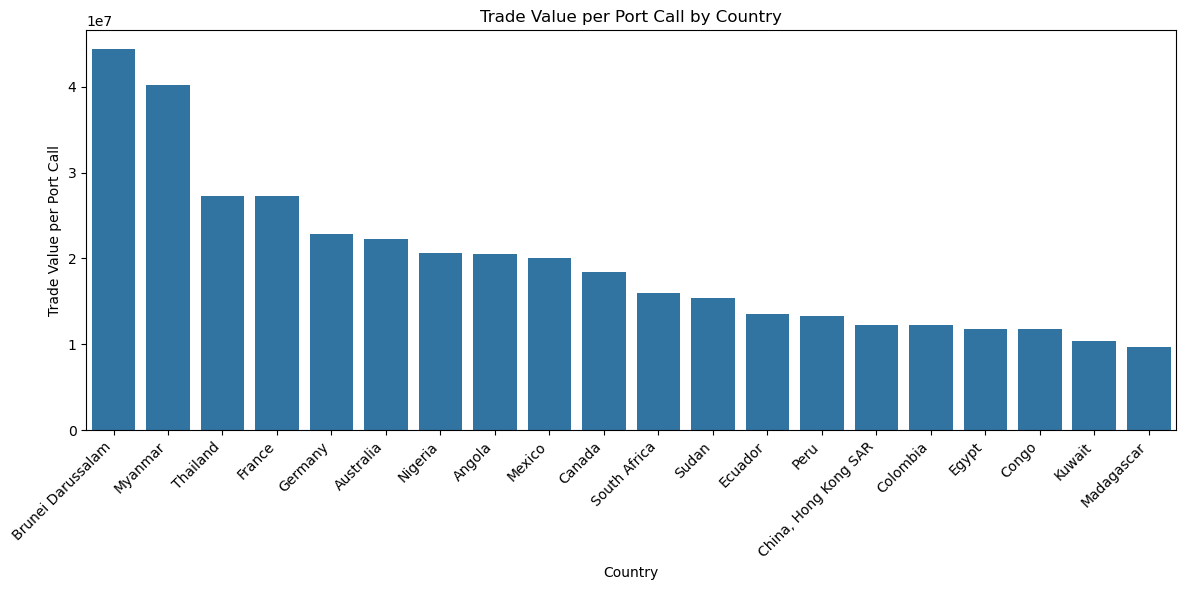

In [87]:
# Plot trade value per port call by country
plt.figure(figsize=(12, 6))
trade_value_pc = sns.barplot(x='country', y='trade_value_per_port_call', data=trade_efficiency_sorted.head(20))
plt.title('Trade Value per Port Call by Country')
plt.xlabel('Country')
plt.ylabel('Trade Value per Port Call')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('/Users/bobbi/Careerfoundry/Shipping_project/04 Analysis/Visualizations/trade_value_pc.png', dpi=300, bbox_inches='tight')
plt.show()

Brunei Darussalam appears to have the highest trade value per port call, suggesting that shipments passing through its ports may be particularly large or high in value. Other countries like Malaysia, Vietnam, and Thailand also show relatively high values, reflecting substantial trade activity or high-value cargo. In the mid-range, nations such as Germany, Australia, and Japan present moderate trade values per port call, which could be influenced by the nature of the goods traded or the frequency of port calls. Towards the lower end, countries like Madagascar exhibit smaller trade values, possibly due to lower shipping volumes or a focus on goods with less monetary value. These differences may be driven by a combination of economic structures, principal exports and imports, and the overall scale of shipping operations in each country.

**Primary Trade Value by Country (Imports and Exports)**

Top contributors to global trade:

Germany, Spain, and Brazil dominate global trade, with the highest primary trade values for both imports and exports. These countries are major economic powerhouses, with well-developed infrastructure and significant roles in global supply chains. Also the distribution of trade value is heavily skewed, with a few countries accounting for the majority of global trade.

Countries like Azerbaijan, New Zealand, and Mauritius have much lower trade values, likely due to smaller economies, geographic constraints, or limited export/import activity. The ranking of countries is consistent across imports and exports, reinforcing the dominance of major economies in global trade.

Trade flow and volume trends
1. Which countries contribute the most to global maritime trade?
Germany, the USA, and Brazil are the largest contributors to global maritime trade, both in terms of imports and exports. These countries play a central role in global supply chains, with significant infrastructure and trade networks supporting their high trade volumes.

2. What are the most common vessel types used in seaborne trade?
The dataset includes vessel types such as bulk carriers, container ships, and oil tankers.

Analyze the distribution of vessel types over time to identify trends (e.g., increasing use of container ships for manufactured goods). Explore how vessel type usage varies by region or country.

3. What percentage of port calls results in actual trade activity?
To assess port efficiency, we need to compare the number of port calls (num_pc) with trade value (primaryValue). Calculate the ratio of trade value per port call for each country or port.
Identify ports with high trade value relative to port calls, indicating higher efficiency.

Country-Specific Trade Analysis
1. Which Countries Have the Largest Trade Surpluses/Deficits?
Trade Balances: Trade surpluses (exports > imports) and deficits (imports > exports) can reveal a country's role in global trade.

Next Steps:

Calculate net trade balances for each country by subtracting imports from exports.

Identify countries with significant surpluses (e.g., export-oriented economies) or deficits (e.g., import-dependent economies).

2. Do Countries Rely More on Certain Vessel Types?
Vessel Preferences: Some countries may rely more on specific vessel types (e.g., oil tankers for oil-exporting countries, container ships for manufacturing hubs).

Next Steps:

Create a grouped bar chart or heatmap to visualize vessel type usage by country.

Identify patterns, such as oil-exporting countries favoring oil tankers.

3. How Do Emerging Economies Compare to Developed Economies?
Economic Groups: Emerging economies (e.g., India, Brazil) and developed economies (e.g., USA, Germany) may have different trade patterns.

Port and Shipping Efficiency
1. Are Certain Ports More Efficient Than Others?
Port efficiency can be measured by trade value per port call or turnaround times.


3. How Do Vessel Types and Sizes Impact Efficiency?
Larger vessels (e.g., large container ships) may handle more cargo but require longer turnaround times.

Weather and Economic Factors
1. How Do Extreme Weather Events Impact Trade?
Extreme weather (e.g., storms, strong winds) can disrupt port operations and vessel movement. Initial analysis shows no strong correlation between weather variables (e.g., wind speed) and trade volumes or port calls.

However, specific cases (e.g., major storms) may still impact trade. Analyse scatterplots of wind speed vs. port calls or trade value or investigate specific weather events to assess their impact.

2. How Does the Global Economic Climate Impact Trade?
Economic Factors: Fuel prices, political events, and economic cycles can influence trade volumes.

Next Steps:

Integrate external data (e.g., fuel prices, GDP trends) to explore correlations with trade activity.

Analyze how economic fluctuations impact trade over time.

Refined Hypotheses
Based on the analysis so far, we can refine the original hypotheses:

**Trade Volumes Fluctuate Seasonally**

Trade volumes peak during certain months due to seasonal demand (e.g., holiday shopping, agricultural harvests). We have seen that the data shows that due to the type of goods being studied it doesn't show any seasonal fluctuations.

**Trade Imbalances Occur Between Specific Regions**

Certain regions (e.g., Asia, North America) have trade surpluses, while others (e.g., Africa) have deficits due to supply chain dependencies. We have seen that there are some regions with a lot of traffic, trade value and interchange of goods whereas others don't have the same amount of traffic.

**Vessel Types and Sizes Impact Trade Efficiency**

Larger vessels (e.g., container ships) are more efficient in handling trade volume. This has been proven that larger ships have a bigger port activity.

**Weather Conditions Impact Port Congestion**

Extreme weather events (e.g., storms) significantly disrupt port operations and trade. Initial analysis suggests limited impact, but further investigation is needed.

**Global Economic Climate Correlates with Trade Fluctuations**
Economic factors (e.g., fuel prices, political events) influence trade volumes. We haven't integrated integrate external economic data to explore correlations yet.

In [71]:
port_data.to_pickle(os.path.join(path, 'port_aggregated.pkl'))
port_data.to_csv(os.path.join(path, 'port_aggregated.csv'))

In [72]:
port_trade_data.to_pickle(os.path.join(path, 'port_trade_data.pkl'))
port_trade_data.to_csv(os.path.join(path, 'port_trade_data.csv'))

In [73]:
total_port_weather.to_pickle(os.path.join(path, 'total_port_weather.pkl'))
total_port_weather.to_csv(os.path.join(path, 'total_port_weather.csv'))

<Figure size 640x480 with 0 Axes>